### Introduction

<div class="alert alert-block alert-info" >
    
Bank "A" is planning to run a marketing campaign aimed at its current customers with the objective of boosting their deposit balances. The campaign will offer special interest rates as a promotion to entice customers to increase their credit balances.The dataset contains real customer data from an international bank and the task is to find right set of customer who are most likely to subscribe for the campaign.To predict this we are using different classification models such as Logistic regression, Decision Tree clasifier, Random forest classifier , AdaBoost Classifier.
    
    


Logistic regression is a statistical method that models the relationship between a binary response variable (0 or 1) and one or more predictor variables. It estimates the probability of the response variable is 1, given the values of the predictor variables. The model uses a logistic function to transform a linear combination of the predictor variables into a probability value between 0 and 1. The logistic function is also known as the sigmoid function. The parameters of the model are estimated using maximum likelihood estimation.

A decision tree classifier is a machine learning algorithm that creates a tree-like model of decisions and their possible consequences. It works by recursively splitting the data based on the feature that maximizes the separation between the classes. The nodes represent the decision rules based on the values of the features, and the leaves represent the class labels. The model can handle categorical and numerical data and is easy to interpret and visualize. It can also handle missing data by imputing the missing values.

Random forest classifier is an ensemble learning algorithm that creates multiple decision trees and aggregates their predictions to make a final prediction. Each tree is built on a random subset of features and data, which reduces the overfitting problem. The algorithm uses bagging (bootstrap aggregation) to create the random subsets of data. The final prediction is based on the majority vote of the individual tree predictions. Random forest can handle both categorical and numerical data, is robust to outliers and missing values, and has high accuracy and low variance.

Adaboost (Adaptive Boosting) classifier is an ensemble learning algorithm that combines weak classifiers to create a strong classifier. It works by iteratively training weak classifiers on the same dataset and assigning higher weights to the misclassified samples in each iteration. The algorithm then combines the weak classifiers based on their accuracy and assigns a weight to each weak classifier proportional to its performance. The final prediction is based on the weighted sum of the individual weak classifier predictions. Adaboost can handle both categorical and numerical data and is less prone to overfitting than individual weak classifiers. It is also computationally efficient and has high accuracy.

XGBoost (Extreme Gradient Boosting) classifier is a powerful machine learning algorithm that uses a gradient boosting framework to create an ensemble of decision trees. It works by iteratively training decision trees on the residuals of the previous tree and assigning higher weights to the misclassified samples. The algorithm also includes regularization terms to control overfitting and uses a novel split finding algorithm to optimize the tree structure. XGBoost is computationally efficient, scalable, and can handle both categorical and numerical data.
</div>

### Dataset

<div class="alert alert-block alert-info" >


train.csv - the training set

test.csv - the test set
    
    
Data fields

`customer_id` - an anonymous id unique to a given customer
    
`Balance` : - Credit Card Balance
    
`PreviousCampaignResult` - Last Campaign Results
    
`Product1...Product6` - List of different products owned by the customer
    
`Transaction1...Transaction9` - Last 9 transactions made by the customer
    
`External Accounts 1...External Accounts 7` - External accounts held by the customer, including bills
    
`Activity Indicator` - Number of activities done the customer, including telebanking, going to the bank
    
`Regular Interaction Indicator` - How frequent the customer is interacting with the bank (Rating Scale)
    
`CompetitiveRate1 ... CompetitiveRate7` - Interest rates offered to the customer
    
`RateBefore` - Interest rates on the products, customer have before the competitive rates being offered
    
`ReferenceRate` -Interest rates on the products, the customer have after the negotiations made to the competitive rates being offered

## Table of contents

1. [Libraries Used](#Libraries) 
2. [Importation and overview of the dataset](#dataset) 
3. [Definition of Target Variable](#Target) 
4. [Missing Values](#missing) 
5. [Data Preparation and EDA](#Preparation) 
6. [Feature Explanation ,selection and Engineering](#clean) 
7. [Split data into train and test](#split)
8. [Metrics](#metric)
9. [Modeling](#model) 
10. [Final Result Analysis](#result)
11. [ANN Implementation](#ANN)
12. [Conclusion](#conclusion)


## 1. Libraries Used <a class="anchor" id="Libraries"></a>

In [1]:
!which python

/Users/jagpreetsingh/ML_Projects/target_marketing/venv/bin/python


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

np.random.seed(123)

t

2023-08-03 00:26:45.780532: E tensorflow/core/lib/monitoring/collection_registry.cc:81] Cannot register 2 metrics with the same name: /tensorflow/api/keras/optimizers


AlreadyExistsError: Another metric with the same name already exists.

In [ ]:
# function to print bold text
def print_bold(text):
    print('\033[1m' + text + '\033[0m')
    return ''


## 2. Importation and Overview of the dataset <a class="anchor" id="dataset"></a>

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)


(63999, 37)
(1480, 36)


<div class="alert alert-block alert-info" >
Method to display the first few rows of the data frame
<div>

In [ ]:
train.head()

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375


In [ ]:
test.head()

,Customer_id,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP063999,13341.55,0,0,0,0,0,0,0,0.0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,CTSP064000,18649.81,0,1,0,0,0,0,0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,CTSP064001,28311.30,0,1,0,0,1,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP064002,18066.61,0,1,0,0,0,0,0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,CTSP064003,10512.30,0,0,0,0,0,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


<div class="alert alert-block alert-info" >
Command used to display the list of columns in dataframe
 <div>

In [ ]:
train.columns

Index(['Customer_id', 'Target', 'Balance', 'PreviousCampaignResult',
       'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')

In [ ]:
test.columns

Index(['Customer_id', 'Balance', 'PreviousCampaignResult', 'Product1',
       'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')

<div class="alert alert-block alert-info" >
Method that displays the summary of the DataFrame's columns, their data types, and the number of non-null values in each column. Additionally, it provides the total number of entries in the DataFrame and the amount of memory used to store the DataFrame. This method is useful for getting an overview of the data and checking for missing values or inconsistencies in the data types.
</div>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  63999 non-null  object 
 1   Target                       63999 non-null  int64  
 2   Balance                      63999 non-null  float64
 3   PreviousCampaignResult       63999 non-null  int64  
 4   Product1                     63999 non-null  int64  
 5   Product2                     63999 non-null  int64  
 6   Product3                     63999 non-null  int64  
 7   Product4                     63999 non-null  int64  
 8   Product5                     63999 non-null  int64  
 9   Product6                     63999 non-null  int64  
 10  Transaction1                 63999 non-null  float64
 11  Transaction2                 63999 non-null  float64
 12  Transaction3                 63999 non-null  float64
 13  Transaction4    

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  1480 non-null   object 
 1   Balance                      1480 non-null   float64
 2   PreviousCampaignResult       1480 non-null   int64  
 3   Product1                     1480 non-null   int64  
 4   Product2                     1480 non-null   int64  
 5   Product3                     1480 non-null   int64  
 6   Product4                     1480 non-null   int64  
 7   Product5                     1480 non-null   int64  
 8   Product6                     1480 non-null   int64  
 9   Transaction1                 1480 non-null   float64
 10  Transaction2                 1480 non-null   float64
 11  Transaction3                 1480 non-null   float64
 12  Transaction4                 1480 non-null   float64
 13  Transaction5      

<div class="alert alert-block alert-info" >
Method that provides descriptive statistics of a Pandas DataFrame called "train". By default, it only calculates the statistics for the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. However, you can pass the include parameter to include non-numerical columns or specific data types. This method is useful for getting a sense of the distribution, range, and outliers of the data, and for identifying potential issues such as missing values, data skewness, or outliers.
</div>

In [ ]:
train.describe()

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,...,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000
mean,0.499773,22697.014218,0.001484,0.200441,0.160456,0.001766,0.092158,0.022125,0.041876,312.852441,...,0.595291,1.379736,1.836435,1.391770,1.757322,1.882755,1.678434,1.412233,1.678434,1.315226
std,0.500004,10819.489043,0.039303,0.400333,0.367031,0.041983,0.289251,0.147092,0.200307,4932.061568,...,1.162643,0.206340,0.370122,0.161833,0.357483,0.516006,0.160600,0.575083,0.160600,0.106634
min,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,0.000000,13499.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,0.000000,19982.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,1.000000,30104.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,1.000000,50000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505000.000000,...,56.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


In [ ]:
test.describe()

,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,22672.102068,0.0,0.183108,0.160811,0.001351,0.081757,0.016216,0.038514,495.695581,99.550993,...,0.591892,1.376014,1.835101,1.387500,1.757432,1.895811,1.674155,1.444324,1.674155,1.314358
std,10682.696143,0.0,0.386886,0.367481,0.036748,0.274086,0.126349,0.192497,7078.143806,747.418046,...,1.047713,0.205837,0.372442,0.160414,0.361200,0.519946,0.158810,0.567507,0.158810,0.107195
min,10000.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,13726.925000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.425000,1.425000,1.425000,1.575000,1.675000,1.475000,1.675000,1.375000
50%,19843.710000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,30129.257500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.475000,2.375000,1.425000,1.675000,2.375000,1.725000,2.125000,1.725000,1.375000
max,49854.420000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,175593.930000,15776.750000,...,15.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


### 3. Definition of Target Variable <a class="anchor" id="Target"></a>

Our tagret variable in the dataframe is a column named "Target" which has 0 and 1 as values , 0 being the customer not responded to the campagin and 1 being customer responding to the campaign

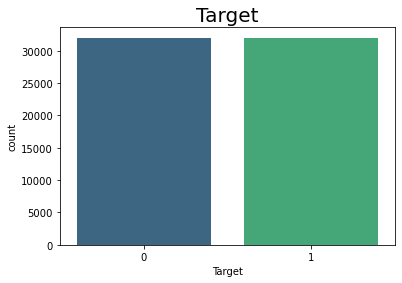

value count
0    32014
1    31985
Name: Target, dtype: int64
Percentage share

0    0.500227
1    0.499773
Name: Target, dtype: float64


In [ ]:
#used to create a countplot that shows the count of samples in each category of the categorical feature "Target"
sns.countplot(data=train,x='Target',palette='viridis')
plt.title('Target',fontsize=20)
plt.show()
print(f"{print_bold('value count')}{train.Target.value_counts()}")

print(f"{print_bold('Percentage share')}")
print(train.Target.value_counts()/train.shape[0])

## 4. Missing Values<a class="anchor" id="missing"></a>

Missing Values for Training data
Percentage:
Customer_id                    0.0
Target                         0.0
Balance                        0.0
PreviousCampaignResult         0.0
Product1                       0.0
Product2                       0.0
Product3                       0.0
Product4                       0.0
Product5                       0.0
Product6                       0.0
Transaction1                   0.0
Transaction2                   0.0
Transaction3                   0.0
Transaction4                   0.0
Transaction5                   0.0
Transaction6                   0.0
Transaction7                   0.0
Transaction8                   0.0
Transaction9                   0.0
ExternalAccount1               0.0
ExternalAccount2               0.0
ExternalAccount3               0.0
ExternalAccount4               0.0
ExternalAccount5               0.0
ExternalAccount6               0.0
ExternalAccount7               0.0
ActivityIndicator              0.0
RegularInt

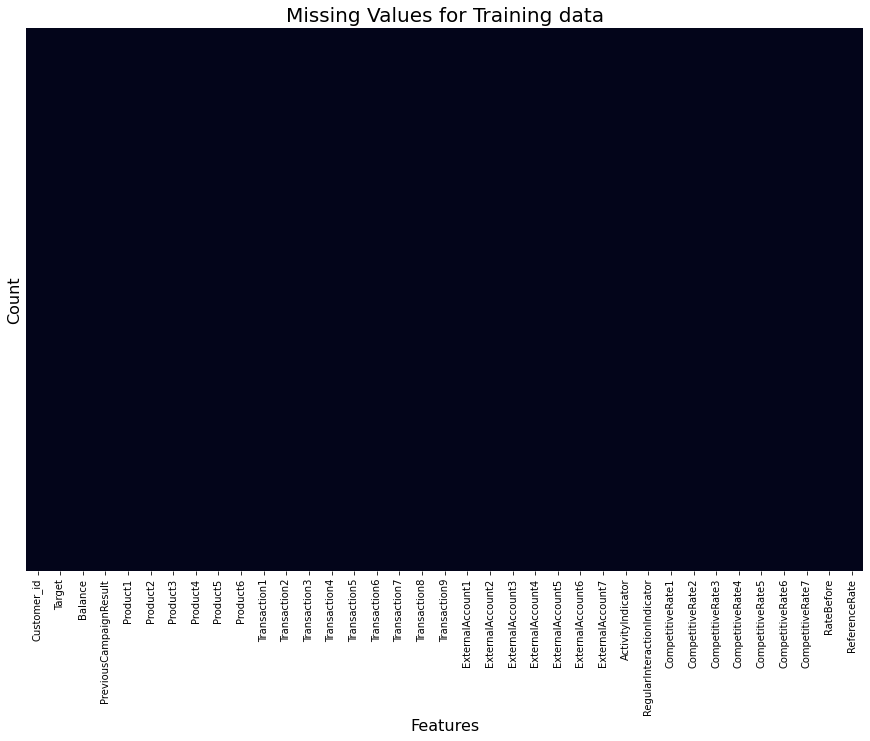

Missing Values for Test Data
Percentage:
Customer_id                    0.0
Balance                        0.0
PreviousCampaignResult         0.0
Product1                       0.0
Product2                       0.0
Product3                       0.0
Product4                       0.0
Product5                       0.0
Product6                       0.0
Transaction1                   0.0
Transaction2                   0.0
Transaction3                   0.0
Transaction4                   0.0
Transaction5                   0.0
Transaction6                   0.0
Transaction7                   0.0
Transaction8                   0.0
Transaction9                   0.0
ExternalAccount1               0.0
ExternalAccount2               0.0
ExternalAccount3               0.0
ExternalAccount4               0.0
ExternalAccount5               0.0
ExternalAccount6               0.0
ExternalAccount7               0.0
ActivityIndicator              0.0
RegularInteractionIndicator    0.0
CompetitiveRat

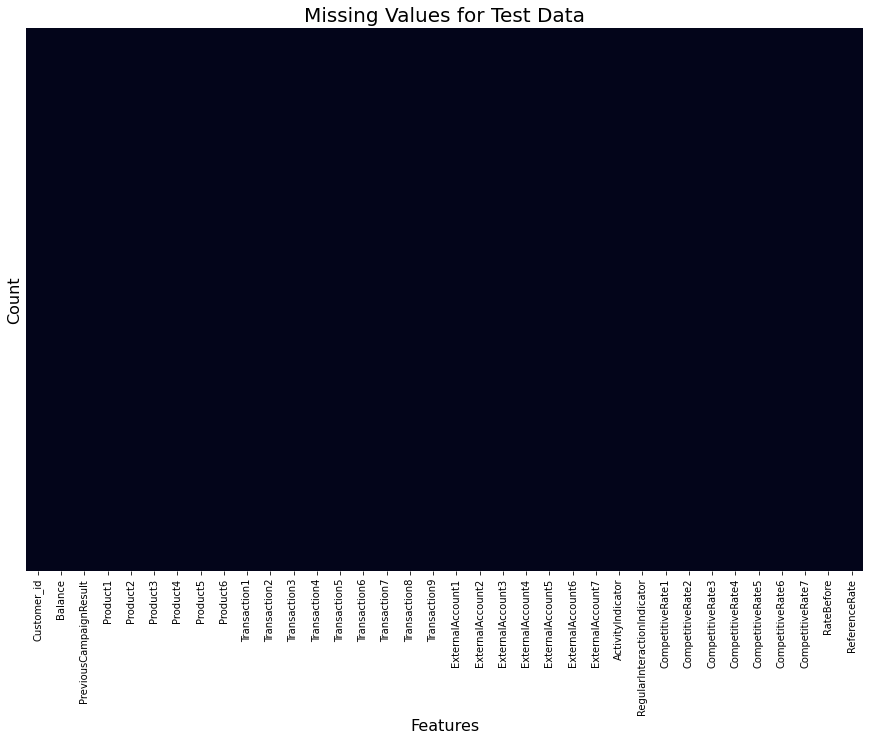

In [ ]:

dataset = [train, test]
title = ["Missing Values for Training data", "Missing Values for Test Data"]
i = 0

for data in dataset:
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(data.isnull(), yticklabels=False, cbar=False)
    ax.set_xlabel("Features", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    plt.title(title[i], fontsize=20)
    print(f"Percentage:{print_bold(title[i])}\n{data.isnull().sum() / data.shape[0]}")
    i += 1
    plt.show()

    

As you can see there are no negative values in any of the columns

## 5. Data Preparation and EDA <a class="anchor" id="Preparation"></a>

In [ ]:
## Categorisation of target, numerical and categorical features

TARGET = "Target"
columns_predictors = [col for col in train.columns if col not in [TARGET,'Customer_id']]
columns_numerical = ['Balance','PreviousCampaignResult','Transaction1',
       'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5',
       'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9','ActivityIndicator', 'RegularInteractionIndicator',
       'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3',
       'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6',
       'CompetitiveRate7', 'RateBefore', 'ReferenceRate']
columns_categorical = [col for col in columns_predictors if col not in columns_numerical]

print(f"{print_bold('TARGET:')}{TARGET}")
print(f"{print_bold('columns_predictors:')} {columns_predictors}\n\n")
print(f"{print_bold('columns_numerical:')} {columns_numerical}\n\n")
print(f"{print_bold('columns_categorical:')} {columns_categorical}")



TARGET:
Target
columns_predictors:
 ['Balance', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate']


columns_numerical:
 ['Balance', 'PreviousCampaignResult', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4', 'Competitiv

## Exploratory Data Analysis

Refers to the process of analyzing and summarizing data sets to extract insights and understand the data better

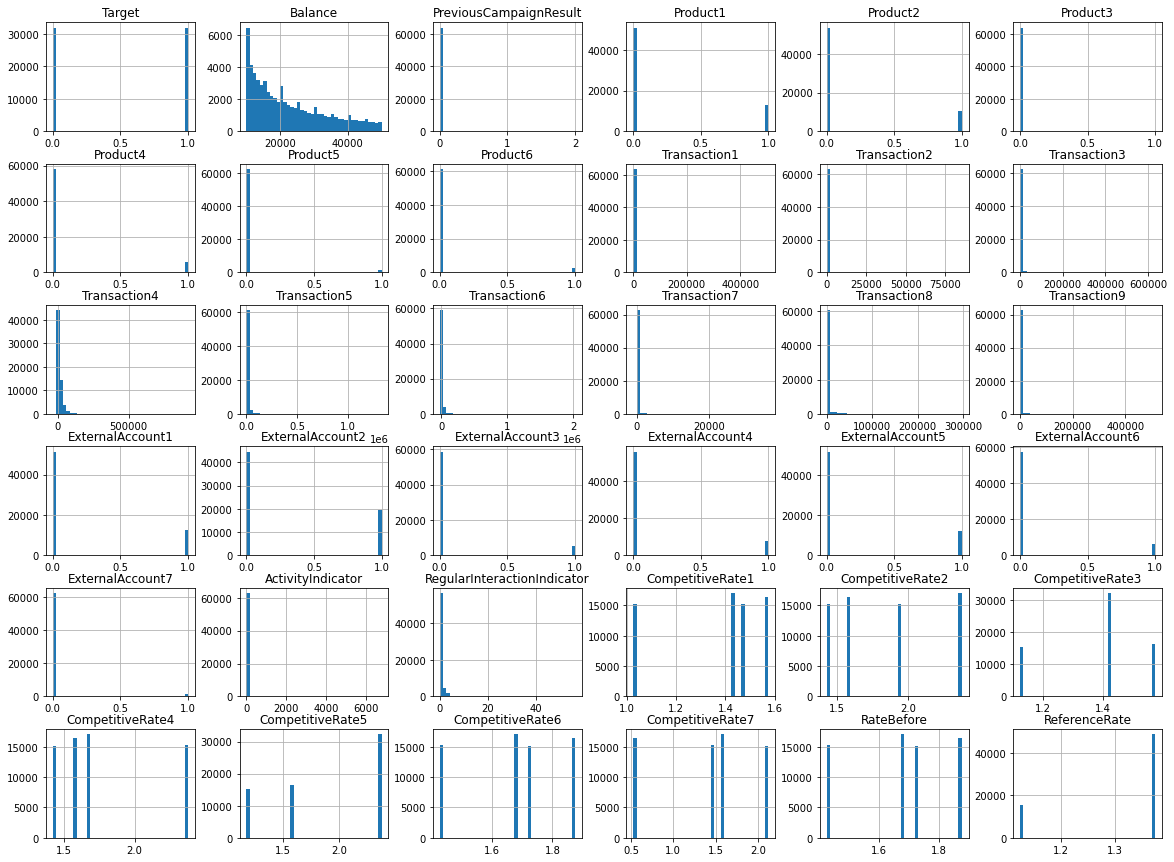

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train.hist(bins=40,figsize=(20,15))
plt.show()

The above code creates a histogram for each numerical columns in the dataset.The plot displays a histogram for each numerical feature in the DataFrame, with the x-axis showing the values of the feature and the y-axis showing the frequency or count of samples that fall into each bin


## Univariate Analysis
Univariate analysis refers to the analysis of a single variable in isolation, without considering the relationships with other variables. Univariate analysis typically involves examining the distribution, central tendency, variability, and outliers of a single variable using statistical measures and graphical representations such as histograms, box plots, and bar charts. The purpose of univariate analysis is to understand the characteristics and patterns of a single variable, which can inform the selection of appropriate modeling techniques, feature engineering, and data preprocessing steps in machine learning and statistical modeling.

### Categorical Features 

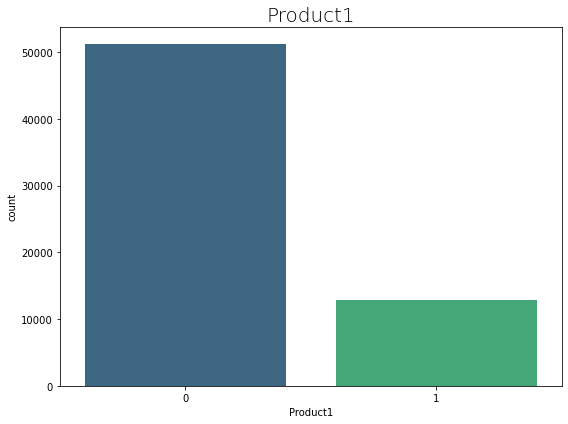

Percentage
0    0.799559
1    0.200441
Name: Product1, dtype: float64


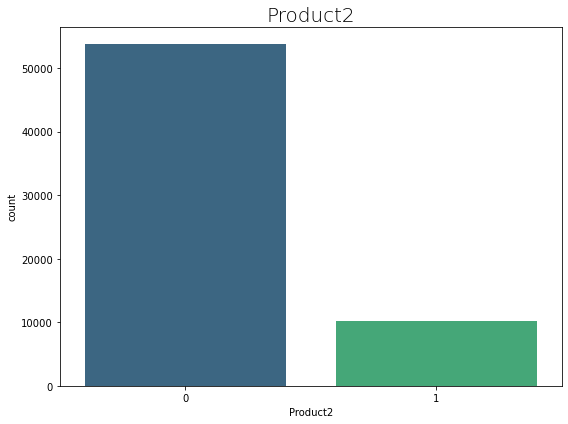

Percentage
0    0.839544
1    0.160456
Name: Product2, dtype: float64


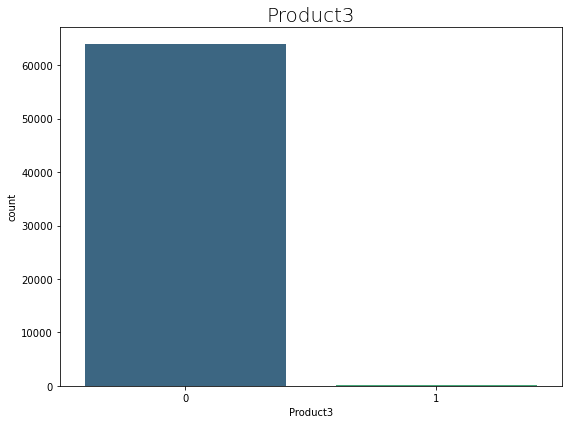

Percentage
0    0.998234
1    0.001766
Name: Product3, dtype: float64


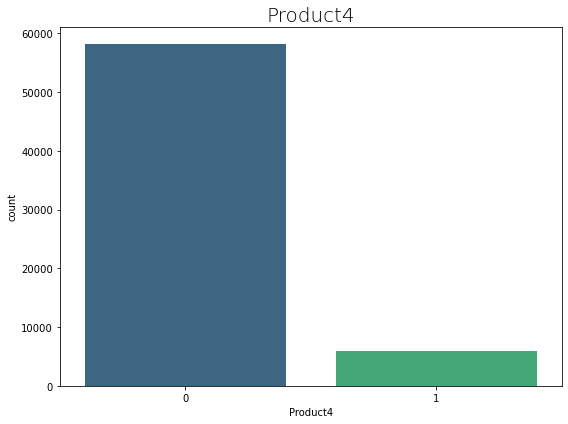

Percentage
0    0.907842
1    0.092158
Name: Product4, dtype: float64


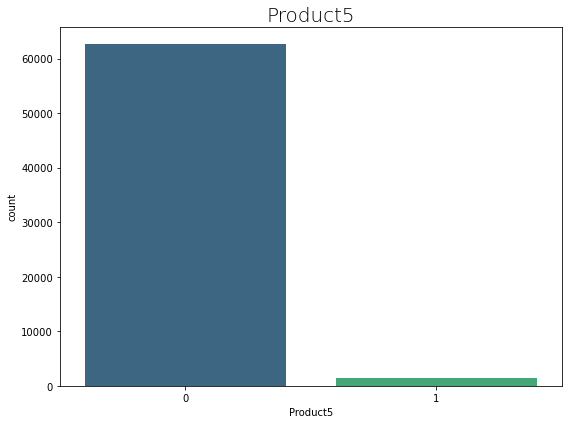

Percentage
0    0.977875
1    0.022125
Name: Product5, dtype: float64


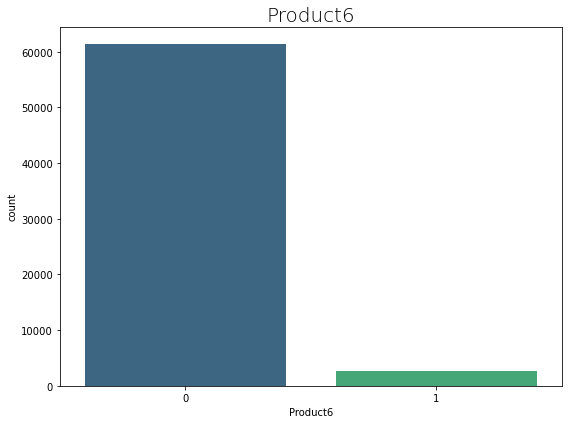

Percentage
0    0.958124
1    0.041876
Name: Product6, dtype: float64


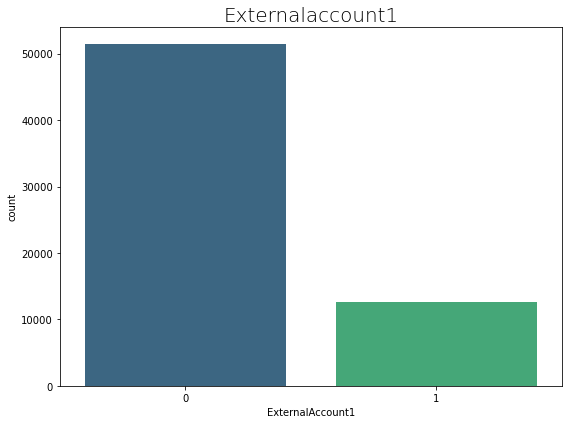

Percentage
0    0.802966
1    0.197034
Name: ExternalAccount1, dtype: float64


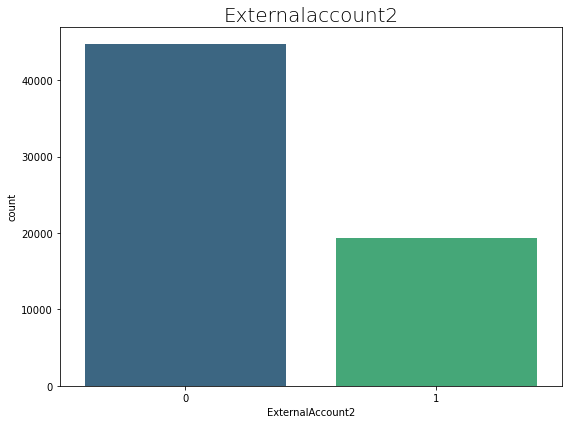

Percentage
0    0.698089
1    0.301911
Name: ExternalAccount2, dtype: float64


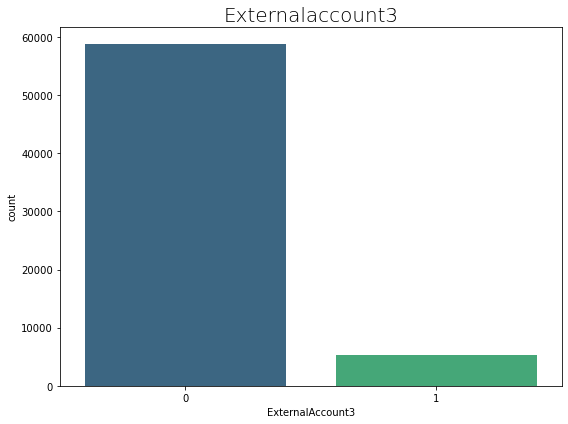

Percentage
0    0.917467
1    0.082533
Name: ExternalAccount3, dtype: float64


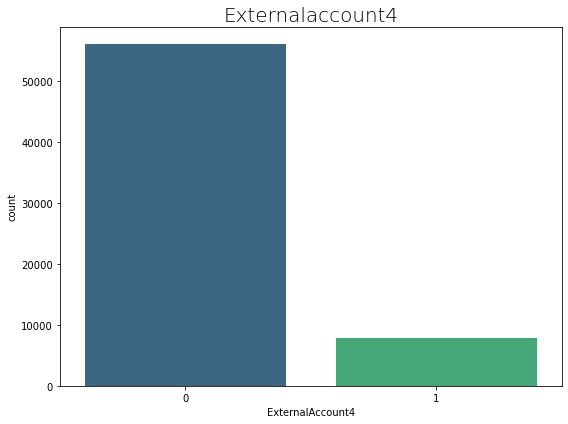

Percentage
0    0.876217
1    0.123783
Name: ExternalAccount4, dtype: float64


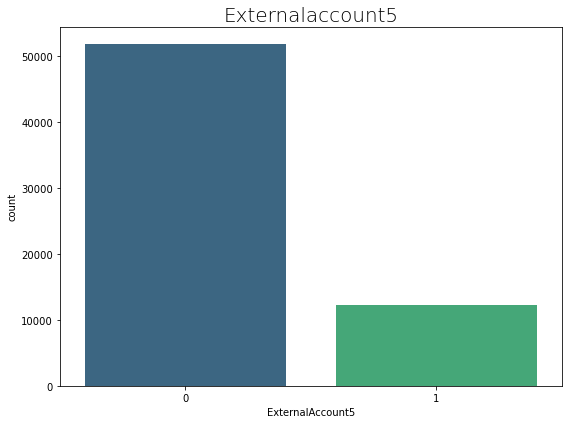

Percentage
0    0.808138
1    0.191862
Name: ExternalAccount5, dtype: float64


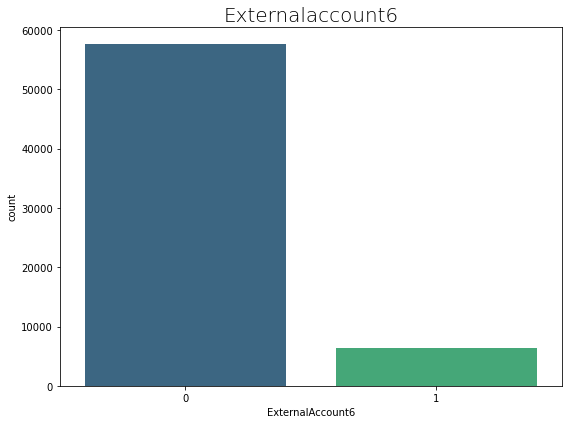

Percentage
0    0.899577
1    0.100423
Name: ExternalAccount6, dtype: float64


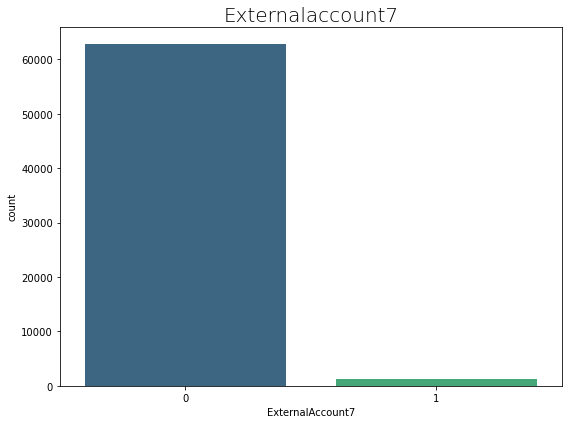

Percentage
0    0.980687
1    0.019313
Name: ExternalAccount7, dtype: float64


In [ ]:
for col in columns_categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(data=train,x=col,palette='viridis')
    plt.title(col.capitalize(),fontsize=20,fontweight=10)
    
    plt.tight_layout()
    plt.show()
    print(f"{print_bold('Percentage')}{train[col].value_counts()/train.shape[0]}")

## Numerical Features

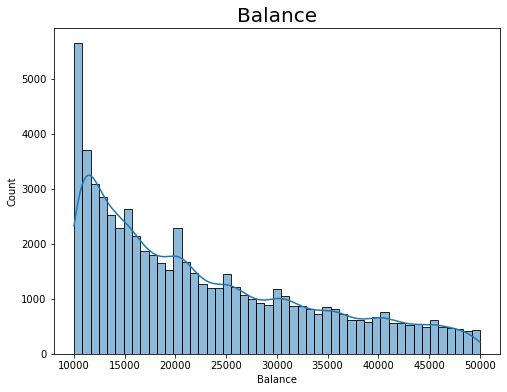

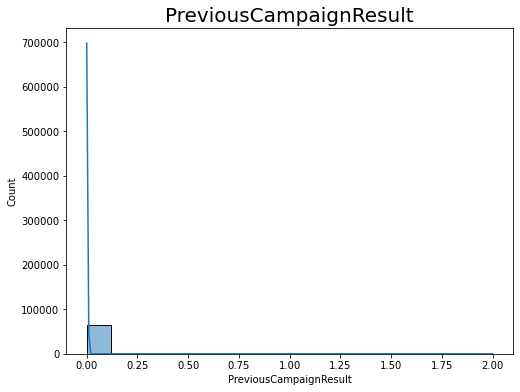

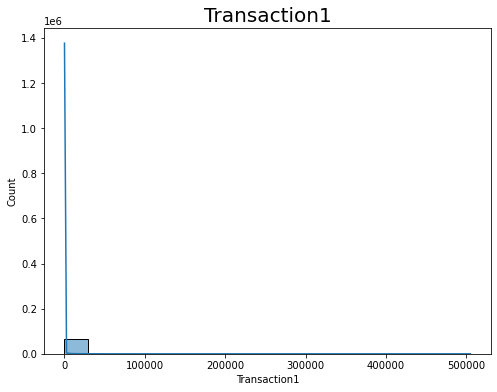

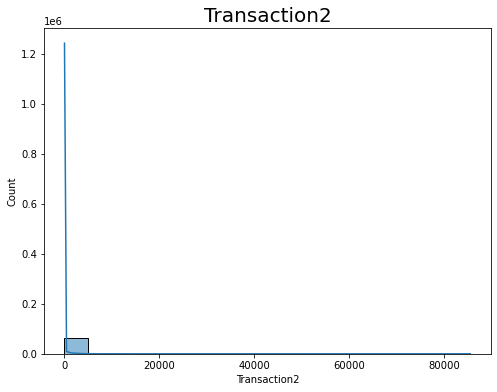

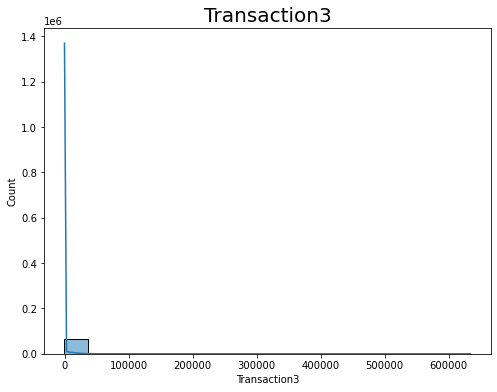

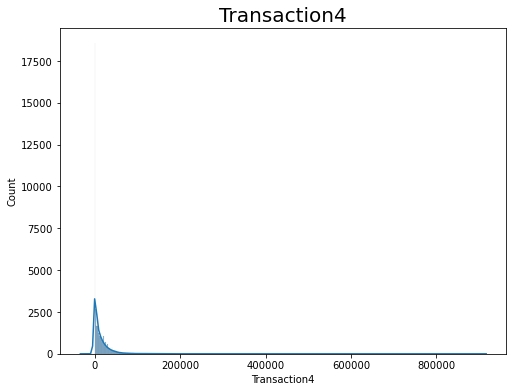

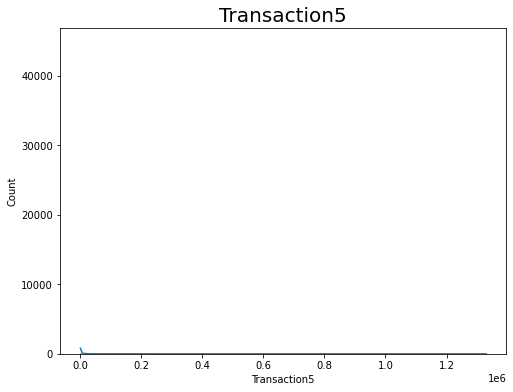

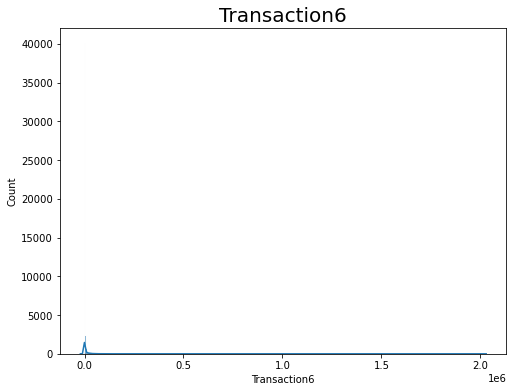

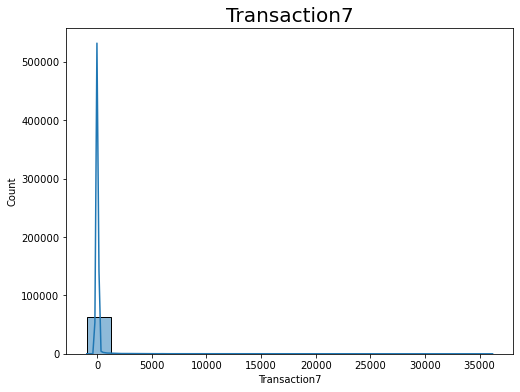

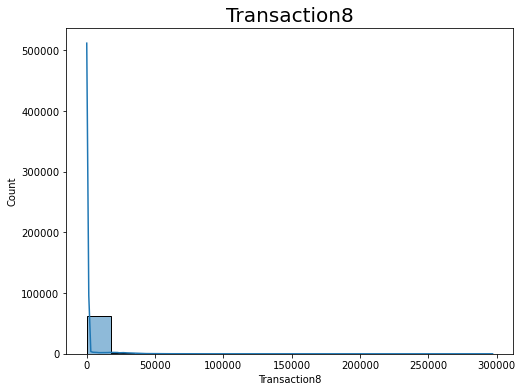

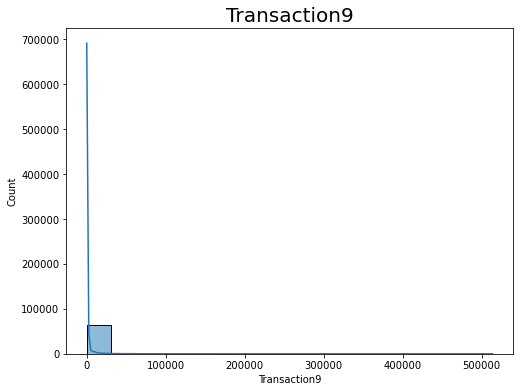

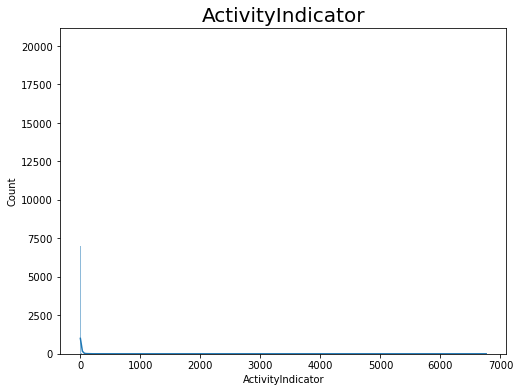

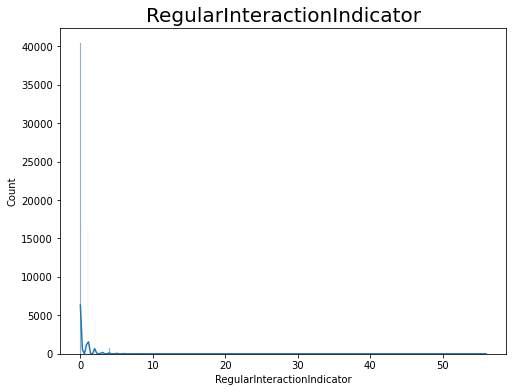

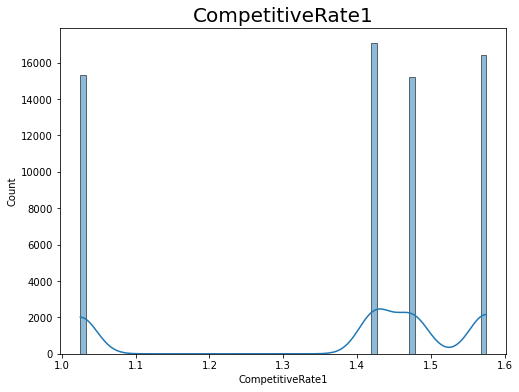

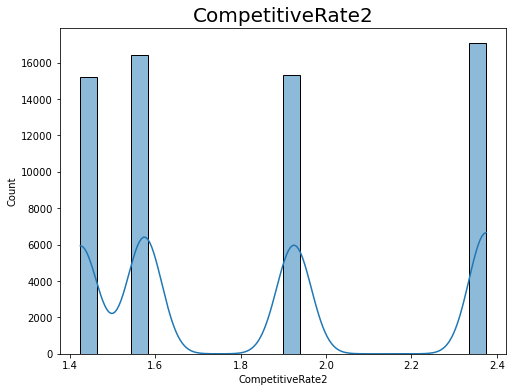

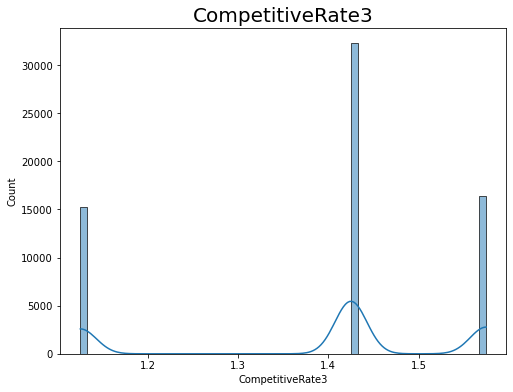

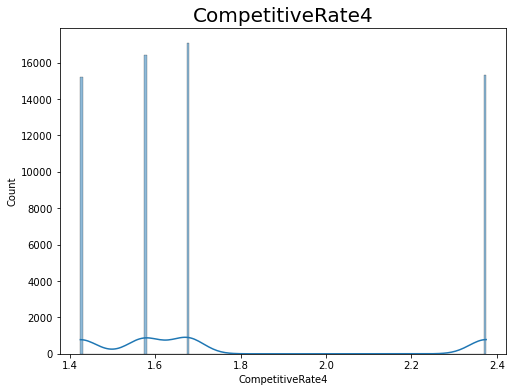

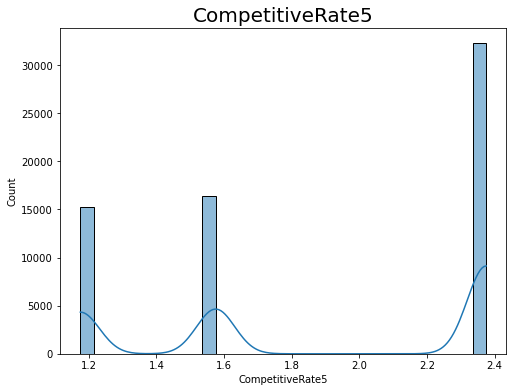

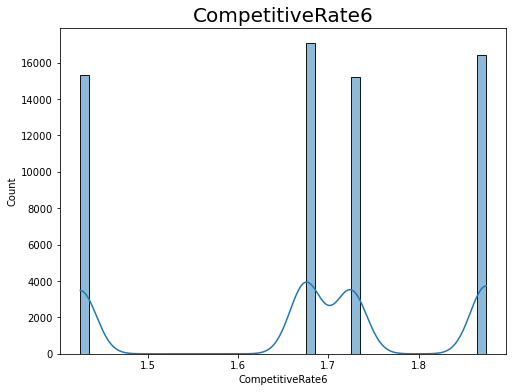

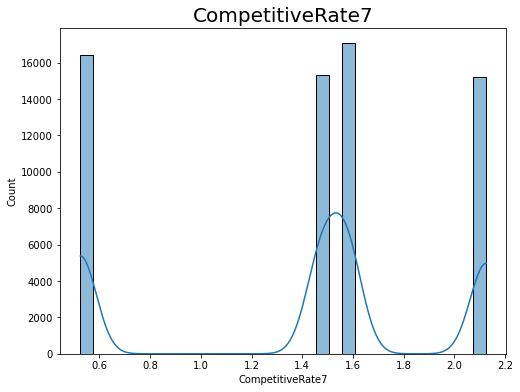

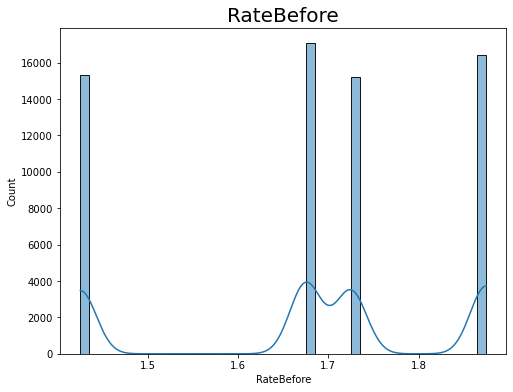

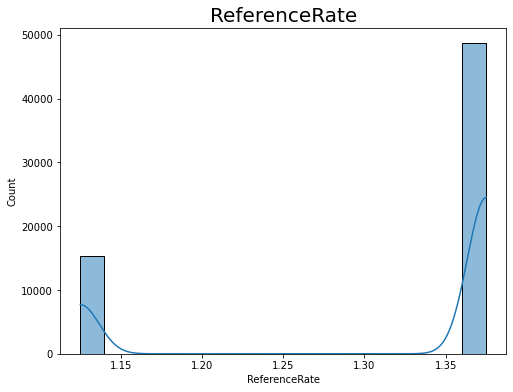

In [ ]:
for col in  columns_numerical:
    plt.figure(figsize=(8,6))
    sns.histplot(x=col,data=train,kde=True)
    
    plt.title(col,fontsize=20)
    plt.show()

## 6. Feature Explanation, Selection and Feature Engineering <a class="anchor" id="clean"></a>

<div class="alert alert-block alert-info" >
    
Explanation of all the features:

customer_id - A unique identifier assigned to each customer that does not reveal their identity.

Balance - The balance amount on the customer's credit card account.

PreviousCampaignResult - The result of the last marketing campaign that the customer was targeted in.

Product1...Product6 - A list of the different products owned by the customer.

Transaction1...Transaction9 - The details of the last 9 transactions made by the customer.

External Accounts 1...External Accounts 7 - The external accounts held by the customer, which may include bills or other financial products.

Activity Indicator - A numerical value indicating the number of activities the customer has done, such as using telebanking or visiting a branch.

Regular Interaction Indicator - A rating scale that indicates how frequently the customer interacts with the bank.

CompetitiveRate1 ... CompetitiveRate7 - The interest rates that are being offered to the customer by the bank.

RateBefore - The interest rates that the customer was paying on their products before being offered the competitive rates.

ReferenceRate - The interest rates on the products after the negotiations are made with the customer to offer the competitive rates.

</div>

In [ ]:
## feature selection

train.columns

Index(['Customer_id', 'Target', 'Balance', 'PreviousCampaignResult',
       'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')

## Observation
transaction individually does not add much weight thus we decided to aggregate the transaction as average

In [ ]:
## feature to calculate average transaction

train['Transaction_mean'] = (train['Transaction1'] + train['Transaction2']+ train['Transaction3'] + train['Transaction4'] + train['Transaction5'] + train['Transaction6'] + train['Transaction7'] + train['Transaction8'] + train['Transaction9'])/9

test['Transaction_mean'] = (test['Transaction1'] + test['Transaction2']+ test['Transaction3'] + test['Transaction4'] + test['Transaction5'] + test['Transaction6'] + test['Transaction7'] + test['Transaction8'] + test['Transaction9'])/9

In [ ]:
## feature to calculate no. of transactions

transactions = ['Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9']
train['total_transactions'] = train[transactions].gt(0).sum(axis=1)
test['total_transactions'] = test[transactions].gt(0).sum(axis=1)

In [ ]:
## feature to calculate no. of external accounts a user has

external_accounts = ['ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7']

train['external_accounts'] = train[external_accounts].sum(axis=1)
test['external_accounts'] = test[external_accounts].sum(axis=1)


In [ ]:
## feature to calculate no. of Products accounts a user has

products = ['Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6']

train['products'] = train[external_accounts].sum(axis=1)
test['products'] = test[external_accounts].sum(axis=1)


In [ ]:
# update columns_predictors and columns_numerical list

columns_numerical.append('Transaction_mean')
columns_predictors.append('Transaction_mean')

columns_numerical.append('total_transactions')
columns_predictors.append('total_transactions')

columns_numerical.append('products')
columns_predictors.append('products')

columns_numerical.append('external_accounts')
columns_predictors.append('external_accounts')


In [ ]:
X = train[columns_predictors]
y = train[TARGET]


print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (63999, 39)
y.shape: (63999,)


## Feature Importance

In [ ]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()

In [ ]:
etc.fit(X,y)

ExtraTreeClassifier()

Balance                        0.251416
Transaction4                   0.127331
ActivityIndicator              0.120050
Transaction_mean               0.115429
Transaction6                   0.055336
RegularInteractionIndicator    0.051884
Transaction5                   0.044178
total_transactions             0.033494
Transaction9                   0.018125
Product4                       0.014516
Name: feature importance, dtype: float64


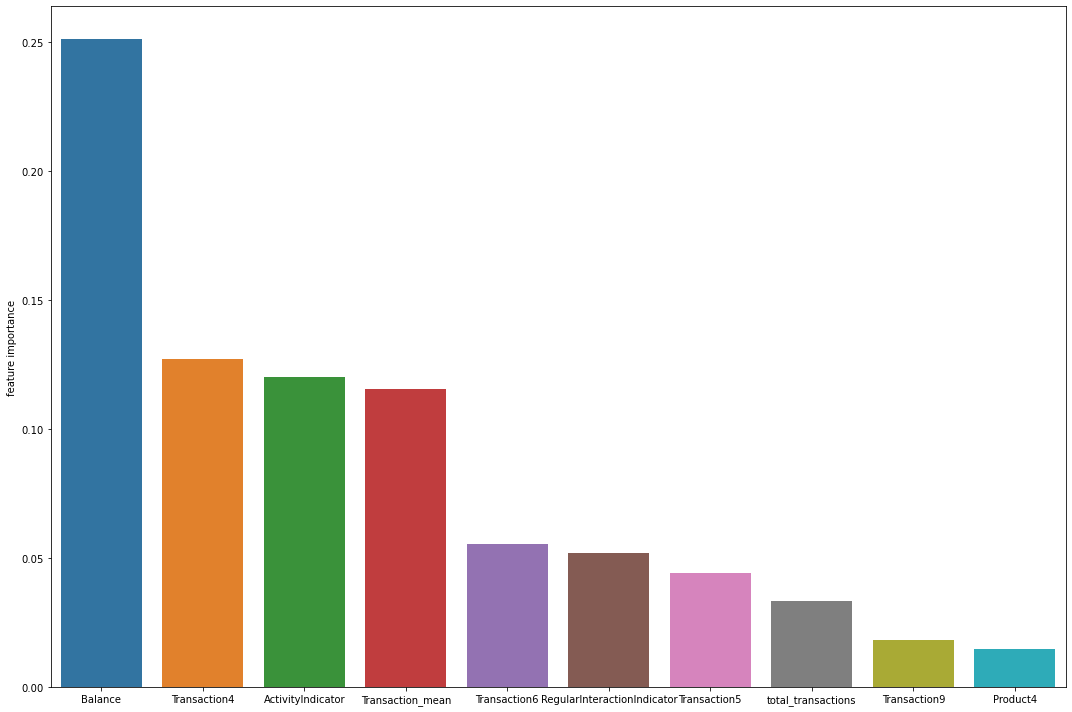

In [ ]:
feature_importance = pd.Series(etc.feature_importances_,name='feature importance',index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)[:10]
print(feature_importance)

plt.figure(figsize=(15,10))
sns.barplot(y=feature_importance,x=feature_importance.index)
plt.tight_layout()

## Observation
 looking at the feature importance graph and distribution for `PreviousCampaignResult` we can drop this feature as has nearly no variance


In [ ]:
## function to drop columns

def drop_columns(columns_name,data,predictors_col=False,numerical_col=False,categorical_col=False):
    """
    columns_name = name of the column to be dropped
    data = name of the dataframe
    predictors_col = False(default) set to True if want to drop from predictors list
    numrical_col = False(default) set to True if column is numerical
    categorical_col = False(default) set to True if column is categorical
    
    The function drops columns from dataset, 
    predictors list and numerical or categorical list(whichever applicable)
    
    """
    
    for col in columns_name:
        data.drop(col,axis=1,inplace=True)
        if predictors_col == True:
            columns_predictors.remove(col)
        if numerical_col == True:
            columns_numerical.remove(col)
        if categorical_col == True:
            columns_categorical.remove(col)
        
        

In [ ]:
train.columns
columns = ['PreviousCampaignResult']
drop_columns(columns,train,predictors_col=True,numerical_col=True)


print(f"columns after drop: {train.columns}\n")
print(f"predictor columns after drop: {columns_predictors}\n")
print(f"numerical columns after drop: {columns_numerical}\n")

columns after drop: Index(['Customer_id', 'Target', 'Balance', 'Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2',
       'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6',
       'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1',
       'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4',
       'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7',
       'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1',
       'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4',
       'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7',
       'RateBefore', 'ReferenceRate', 'Transaction_mean', 'total_transactions',
       'external_accounts', 'products'],
      dtype='object')

predictor columns after drop: ['Balance', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transactio

In [ ]:
## drop from test as well
columns = ['PreviousCampaignResult']
drop_columns(columns,test)

print(f"columns after drop: {test.columns}\n")
print(f"predictor columns after drop: {columns_predictors}\n")
print(f"numerical columns after drop: {columns_numerical}\n")

columns after drop: Index(['Customer_id', 'Balance', 'Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2',
       'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6',
       'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1',
       'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4',
       'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7',
       'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1',
       'CompetitiveRate2', 'CompetitiveRate3', 'CompetitiveRate4',
       'CompetitiveRate5', 'CompetitiveRate6', 'CompetitiveRate7',
       'RateBefore', 'ReferenceRate', 'Transaction_mean', 'total_transactions',
       'external_accounts', 'products'],
      dtype='object')

predictor columns after drop: ['Balance', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Tran

### 7. Split Data into train and test <a class="anchor" id="split"></a>

In [ ]:
X = train[columns_predictors]
y = train[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_val.shape: {y_val.shape}")

X_train.shape: (44799, 38)
X_val.shape: (19200, 38)
y_train.shape: (44799,)
y_val.shape: (19200,)


In [ ]:
#Create numerical pipeline to transform numerical values

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('missing',SimpleImputer(strategy='most_frequent'))
])

pipeline_numerical = Pipeline([
    ('missing',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [ ]:
pipeline_full.fit(X_train)
X_train = pipeline_full.transform(X_train)
X_val = pipeline_full.transform(X_val)
print(f"X_train transformed.shape: {X_train.shape}")
print(f"X_val transformed.shape: {X_val.shape}")

X_train transformed.shape: (44799, 38)
X_val transformed.shape: (19200, 38)


## 8. Metrics<a class="anchor" id="metric"></a>

In [ ]:
def validation_score(y_test,y_pred):
    print(f"{print_bold('accuracy score:')} {accuracy_score(y_test,y_pred)}")
    print(f"{print_bold('f1 score :')} {f1_score(y_test,y_pred)}")
    print(f"{print_bold('Roc Auc score:')} {roc_auc_score(y_test,y_pred)}")
    print(f"{print_bold('confusion metric:')}\n {confusion_matrix(y_test,y_pred)}")
    print(f"{print_bold('classification report:')}\n{classification_report(y_test,y_pred)}")
    
    return f1_score(y_test,y_pred)

In [ ]:
test_score = []
val_score = []
models = []

## 9. Modeling<a class="anchor" id="model"></a>

## Logistic Regression

In [ ]:

for cv in [2,3,4,5,6,7,8]:
    lr = LogisticRegressionCV(cv=cv,max_iter=1000)

    lr.fit(X_train,y_train)
    y_pred_lr = lr.predict(X_val)
    print("Folds",cv, f1_score(y_val,y_pred_lr))

Folds 2 0.5812973883740523
Folds 3 0.5812608768876664
Folds 4 0.5811812261396812
Folds 5 0.5810363217874587
Folds 6 0.5811485993375626
Folds 7 0.5814567304992418
Folds 8 0.5810363217874587


## Hypertunning on Logictic Regression

In [ ]:
lr_grid = LogisticRegression(max_iter=1000)
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(lr_grid,params, cv=5, verbose=1)

grid_search_lr.fit(X_train,y_train)





Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, verbose=1)

In [ ]:
print(f"{print_bold('best_estimator_:')}{grid_search_lr.best_estimator_}")
y_pred_lr_grid = grid_search_lr.predict(X_val)

best_estimator_:
LogisticRegression(C=0.1, max_iter=1000)


In [ ]:
f1_lr = validation_score(y_val,y_pred_lr_grid)

accuracy score:
 0.6116145833333333
f1 score :
 0.5812791285305184
Roc Auc score:
 0.6115845028792539
confusion metric:

 [[6567 3037]
 [4420 5176]]
classification report:

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      9604
           1       0.63      0.54      0.58      9596

    accuracy                           0.61     19200
   macro avg       0.61      0.61      0.61     19200
weighted avg       0.61      0.61      0.61     19200



In [ ]:
val_score.append(f1_lr)
models.append('LogisticRegression()')


In [ ]:
X_test = test[columns_predictors]

X_test = pipeline_full.transform(X_test)
print(f"Shape:{X_test.shape}")


Shape:(1480, 38)


In [ ]:
y_test_lr = grid_search_lr.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_lr})

output.to_csv('Submission_grid_lr_-9apr.csv',index=False)

In [ ]:
## test score = .6081

In [ ]:
test_score.append(.6081)

## Decision Tree


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_val)

In [ ]:
f1_dt = validation_score(y_val,dtc_pred)

accuracy score:
 0.5469270833333333
f1 score :
 0.5450551749385493
Roc Auc score:
 0.5469254638759485
confusion metric:

 [[5290 4314]
 [4385 5211]]
classification report:

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9604
           1       0.55      0.54      0.55      9596

    accuracy                           0.55     19200
   macro avg       0.55      0.55      0.55     19200
weighted avg       0.55      0.55      0.55     19200



In [ ]:
val_score.append(f1_dt)
models = ['DecisionTreeClassifier()']

In [ ]:
y_test_dt = dtc.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_dt})

output.to_csv('Submission_dt_9apr.csv',index=False)

In [ ]:
## test score 0.5777
test_score.append(0.5777)

### Hypertuning for Decision Tree

max_depth: (1, 0.5384754226580831)
max_depth: (2, 0.6474079569693035)
max_depth: (3, 0.5796839729119639)
max_depth: (5, 0.6027412161427174)
max_depth: (4, 0.6021832401021018)
max_depth: (6, 0.5903892738437271)
max_depth: (7, 0.587251356238698)
max_depth: (8, 0.606421571281607)
max_depth: (10, 0.6018548474064488)
max_depth: (20, 0.5567088745176894)
max_depth: (30, 0.5359448988377099)
max_depth: (50, 0.5428014539324658)
max_depth: (70, 0.5441307422345608)
max_depth: (100, 0.5456351280710925)
max_depth: (120, 0.5456351280710925)


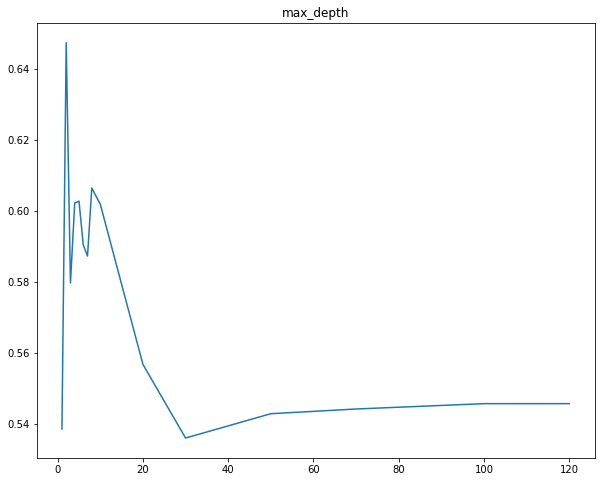

In [ ]:
max_depth = [1,2,3,5,4,6,7,8,10,20,30,50,70,100,120]
score = []
for depth in max_depth:
    dtc = DecisionTreeClassifier(max_depth=depth,random_state=42)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_val)
    print(f"max_depth: {depth,f1_score(y_val,pred)}")
    score.append(f1_score(y_val,pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=max_depth,y=score)
plt.title('max_depth')
plt.show()
    

In [ ]:
#max_depth = 8

minimum_samples: (1, 0.5456351280710925)
minimum_samples: (10, 0.5512378902045211)
minimum_samples: (15, 0.564473754758458)
minimum_samples: (20, 0.5700954400848357)
minimum_samples: (30, 0.5778369738945124)
minimum_samples: (50, 0.5879394296110012)
minimum_samples: (70, 0.5957016703904671)
minimum_samples: (100, 0.6011573081868838)
minimum_samples: (120, 0.6136555508653441)
minimum_samples: (125, 0.621383516655372)
minimum_samples: (130, 0.6201161148595637)
minimum_samples: (140, 0.6253693432170442)
minimum_samples: (145, 0.6270069987649238)
minimum_samples: (150, 0.6192464252165745)
minimum_samples: (155, 0.619301547469678)
minimum_samples: (160, 0.6161297115182144)


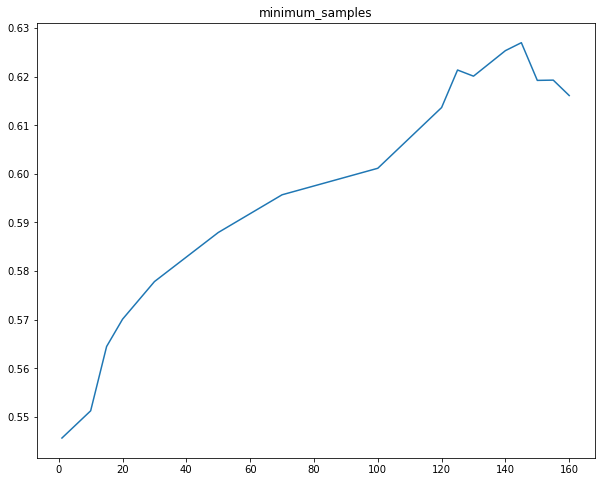

In [ ]:
minimum_samples = [1,10,15,20,30,50,70,100,120,125,130,140,145,150,155,160]
score = []
for min_sample in minimum_samples:
    dtc = DecisionTreeClassifier(min_samples_leaf=min_sample,random_state=42)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_val)
    print(f"minimum_samples: {min_sample,f1_score(y_val,pred)}")
    score.append(f1_score(y_val,pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=minimum_samples,y=score) 
plt.title('minimum_samples')
plt.show()    
    

In [ ]:
#  min_samples_leaf = 145

criterions: ('gini', 0.5456351280710925)
criterions: ('entropy', 0.5452732140045141)


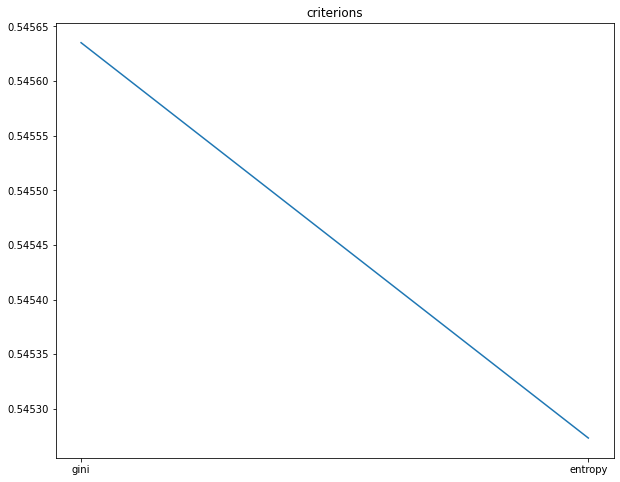

In [ ]:
criterions = ['gini','entropy']
score = []
for criterion in criterions:
    dtc = DecisionTreeClassifier(criterion=criterion,random_state=42)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_val)
    print(f"criterions: {criterion,f1_score(y_val,pred)}")
    score.append(f1_score(y_val,pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=criterions,y=score) 
plt.title('criterions')
plt.show()    
        

In [ ]:
## criterion = 'gini'

maximum_features: (1, 0.5348567818028643)
maximum_features: (3, 0.5442864665613482)
maximum_features: (5, 0.5427731709877192)
maximum_features: (7, 0.5445846477392219)
maximum_features: (9, 0.549861278333246)
maximum_features: (10, 0.54510214772132)
maximum_features: (15, 0.548382021293334)
maximum_features: (20, 0.5481031230350032)
maximum_features: (25, 0.5460783278792357)
maximum_features: (30, 0.5551215955840233)
maximum_features: (35, 0.5471293243313969)


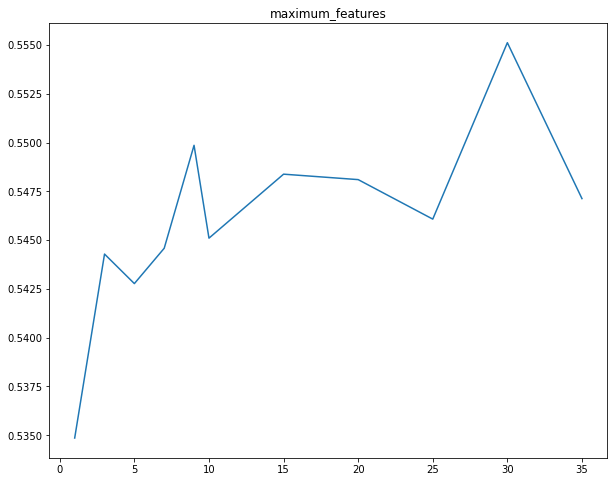

In [ ]:
maximum_features = [1,3,5,7,9,10,15,20,25,30,35]
score = []
for maximum_feature in maximum_features:
    dtc = DecisionTreeClassifier(max_features=maximum_feature,random_state=42)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_val)
    print(f"maximum_features: {maximum_feature,f1_score(y_val,pred)}")
    score.append(f1_score(y_val,pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=maximum_features,y=score) 
plt.title('maximum_features')
plt.show()     


In [ ]:
# max_features=9

In [ ]:
dtc_1 = DecisionTreeClassifier(max_features=9,criterion = 'gini',min_samples_leaf = 145,max_depth = 8)
dtc_1.fit(X_train,y_train)
y_pred = dtc.predict(X_val)

f1_dtc_1 = validation_score(y_val,y_pred)


accuracy score:
 0.5493229166666667
f1 score :
 0.5471293243313969
Roc Auc score:
 0.5493209938057282
confusion metric:

 [[5320 4284]
 [4369 5227]]
classification report:

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9604
           1       0.55      0.54      0.55      9596

    accuracy                           0.55     19200
   macro avg       0.55      0.55      0.55     19200
weighted avg       0.55      0.55      0.55     19200



In [ ]:
val_score.append(f1_dtc_1)
models.append("DecisionTreeClassifier() tunned")

In [ ]:
y_test_dtc_1 = dtc_1.predict(X_test)

In [ ]:
output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_dtc_1})

output.to_csv('Submission_dt_1-9apr.csv',index=False)

In [ ]:
#.63175
test_score.append(.63175)

# Hypertuning with Grid Search CV on Decision Tree

In [ ]:
dtc_grid = DecisionTreeClassifier(random_state=42)



In [ ]:
param_grid = {'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5,6,7,8,10,15,30,40,50],
            'max_features':[1,3,5,6,7,8,9,10,12,13,17,18,20],
            'min_samples_leaf':[1,50,80,100,120,125,130,135,140,146,148,150]
}

In [ ]:
grid_dt = GridSearchCV(dtc_grid,param_grid,scoring='f1',cv=5,verbose=1,n_jobs=-1)

In [ ]:

grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 4056 candidates, totalling 20280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 30, 40,
                                       50],
                         'max_features': [1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 17,
                                          18, 20],
                         'min_samples_leaf': [1, 50, 80, 100, 120, 125, 130,
                                              135, 140, 146, 148, 150]},
             scoring='f1', verbose=1)

In [ ]:
print(f"{print_bold('best_params_:')}{grid_dt.best_params_}")

best_params_:
{'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}


In [ ]:
y_pred_gr_dt = grid_dt.predict(X_val)

In [ ]:
f1_gr_dt = validation_score(y_val,y_pred_gr_dt)

accuracy score:
 0.54453125
f1 score :
 0.6566953244611942
Roc Auc score:
 0.544667477372826
confusion metric:

 [[2091 7513]
 [1232 8364]]
classification report:

              precision    recall  f1-score   support

           0       0.63      0.22      0.32      9604
           1       0.53      0.87      0.66      9596

    accuracy                           0.54     19200
   macro avg       0.58      0.54      0.49     19200
weighted avg       0.58      0.54      0.49     19200



In [ ]:
val_score.append(f1_gr_dt)
models.append("DecisionTreeClassifier() GridSearch")

In [ ]:
y_test_gr_dt = grid_dt.predict(X_test)

In [ ]:
output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_gr_dt})

output.to_csv('Submission_grid_dt_1-9apr.csv',index=False)

In [ ]:
# .5625
test_score.append(.5625)

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_val)
f1_rf = validation_score(y_val,y_pred)

accuracy score:
 0.5493229166666667
f1 score :
 0.5471293243313969
Roc Auc score:
 0.5493209938057282
confusion metric:

 [[5320 4284]
 [4369 5227]]
classification report:

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9604
           1       0.55      0.54      0.55      9596

    accuracy                           0.55     19200
   macro avg       0.55      0.55      0.55     19200
weighted avg       0.55      0.55      0.55     19200



In [ ]:
val_score.append(f1_rf)
models.append('RandomForestClassifier()')

In [ ]:
y_test_rf = rf.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_rf})

output.to_csv('Submission_rf_9apr.csv',index=False)

In [ ]:
## test score = 0.5929
test_score.append(0.5929)


### Hypertuning for Random Forest

n_estimators: (1, 0.5415674445679209)
n_estimators: (5, 0.573970963209658)
n_estimators: (8, 0.5363380281690141)
n_estimators: (10, 0.5512289422811377)
n_estimators: (50, 0.6086464812625302)
n_estimators: (60, 0.60945260894055)
n_estimators: (80, 0.6108163265306122)
n_estimators: (100, 0.6149623907298231)
n_estimators: (120, 0.6163694558756287)
n_estimators: (150, 0.6172263366135741)
n_estimators: (170, 0.6182463253928029)
n_estimators: (175, 0.6201018709970245)
n_estimators: (180, 0.6179364918332151)
n_estimators: (190, 0.6170234351222481)
n_estimators: (200, 0.6166244298023315)
n_estimators: (210, 0.61617237008872)
n_estimators: (250, 0.6181983990272572)


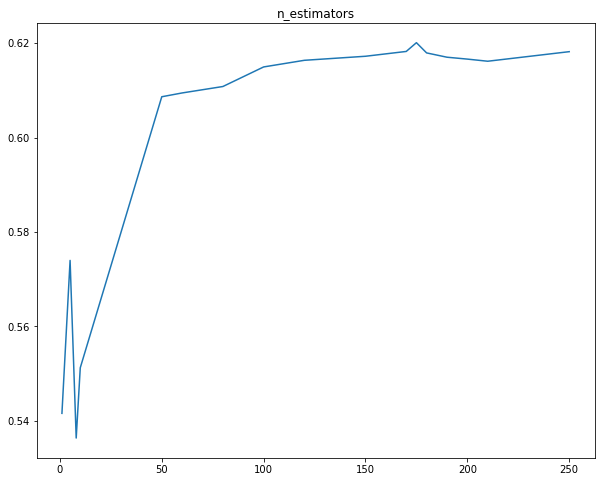

In [ ]:
n_estimators = [1,5,8,10,50,60,80,100,120,150,170,175,180,190,200,210,250]
scores = []
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator,random_state=101)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    print(f"n_estimators: {n_estimator,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=n_estimators,y=scores) 
plt.title('n_estimators')
plt.show()    
    

In [ ]:
# n_estimators = 175

max_features: (1, 0.6013653603034134)
max_features: (2, 0.6063974935570267)
max_features: (4, 0.6126052978788187)
max_features: (7, 0.6135238581270732)
max_features: (9, 0.6143449546920596)
max_features: (11, 0.6123284865861152)
max_features: (14, 0.6088610197368421)
max_features: (17, 0.605473380405092)
max_features: (18, 0.6045145330859617)
max_features: (19, 0.6032695580423908)
max_features: (20, 0.6060074318744838)
max_features: (21, 0.6056352564764165)
max_features: (22, 0.6054723799690243)
max_features: (23, 0.6039235931853382)
max_features: (24, 0.6050664451827241)
max_features: (25, 0.6054305663304888)
max_features: (40, 0.5999272689490364)
max_features: (50, 0.5999272689490364)


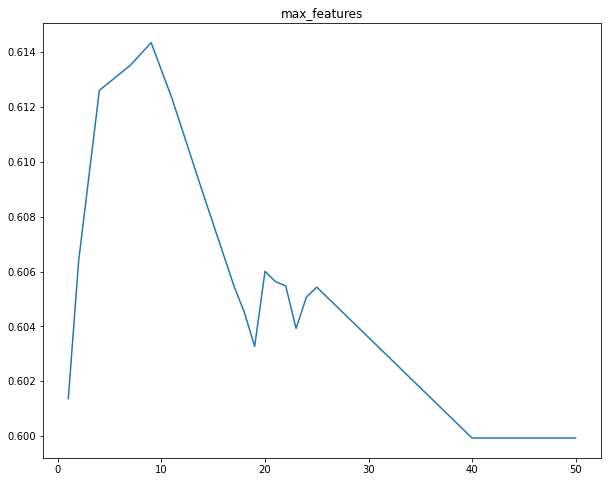

In [ ]:
max_features = [1,2,4,7,9,11,14,17,18,19,20,21,22,23,24,25,40,50]
scores = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature,random_state=101)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    print(f"max_features: {max_feature,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=max_features,y=scores) 
plt.title('max_features')
plt.show()     

In [ ]:
# max_features = 9

max_depths: (1, 0.6119068701494869)
max_depths: (4, 0.6103440951571794)
max_depths: (6, 0.6158730158730159)
max_depths: (7, 0.6124919648596528)
max_depths: (8, 0.6143783841741275)
max_depths: (9, 0.6145810898126212)
max_depths: (10, 0.6165236051502145)
max_depths: (11, 0.6152439352374806)
max_depths: (12, 0.6175981102700381)
max_depths: (15, 0.6200214132762313)
max_depths: (19, 0.6176876526170507)
max_depths: (23, 0.616502823677055)
max_depths: (27, 0.6176151901346679)
max_depths: (50, 0.6151968263655782)


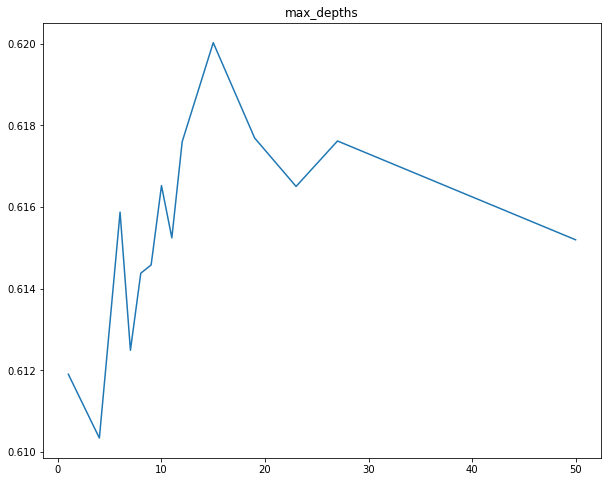

In [ ]:
max_depths = [1,4,6,7,8,9,10,11,12,15,19,23,27,50]
scores = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth,random_state=101)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    print(F"max_depths: {max_depth,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=max_depths,y=scores) 
plt.title('max_depths')
plt.show()         


In [ ]:
# max_depth =15

min_samples_splits: (2, 0.6149623907298231)
min_samples_splits: (25, 0.6232475413266374)
min_samples_splits: (50, 0.6225976768743401)
min_samples_splits: (70, 0.6214581343521172)
min_samples_splits: (75, 0.6222505578578259)
min_samples_splits: (100, 0.6225672657662448)
min_samples_splits: (105, 0.6227195587611372)
min_samples_splits: (110, 0.6231768761601697)
min_samples_splits: (150, 0.621595744680851)
min_samples_splits: (500, 0.6190805208610151)
min_samples_splits: (1000, 0.6187119003445535)


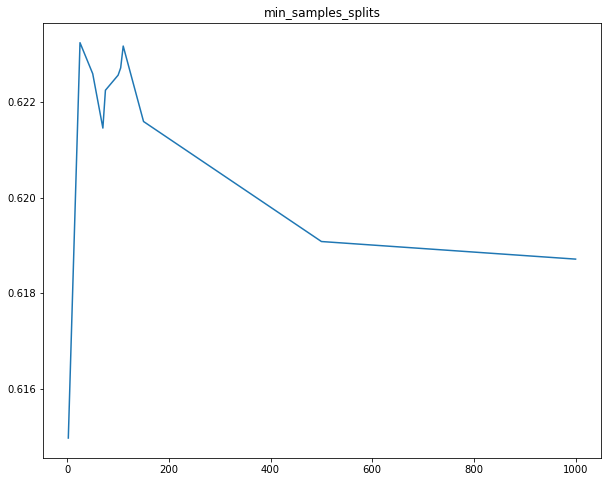

In [ ]:
min_samples_splits = [2,25,50,70,75,100,105,110,150,500,1000]
scores = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split,random_state=101)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    print(f"min_samples_splits: {min_samples_split,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=min_samples_splits,y=scores) 
plt.title('min_samples_splits')
plt.show()    

In [ ]:
# min_samples_split = 110

min_samples_leafs: (1, 0.6149623907298231)
min_samples_leafs: (3, 0.6211284640058894)
min_samples_leafs: (4, 0.6187065626823705)
min_samples_leafs: (5, 0.61988117971568)
min_samples_leafs: (7, 0.6221442992243119)
min_samples_leafs: (10, 0.6195095948827293)
min_samples_leafs: (15, 0.6183528405750628)
min_samples_leafs: (20, 0.6213778750200117)
min_samples_leafs: (25, 0.62022543939313)
min_samples_leafs: (40, 0.6163629562336344)
min_samples_leafs: (60, 0.6155987366843316)
min_samples_leafs: (100, 0.6154421187526699)
min_samples_leafs: (200, 0.6150804253727356)


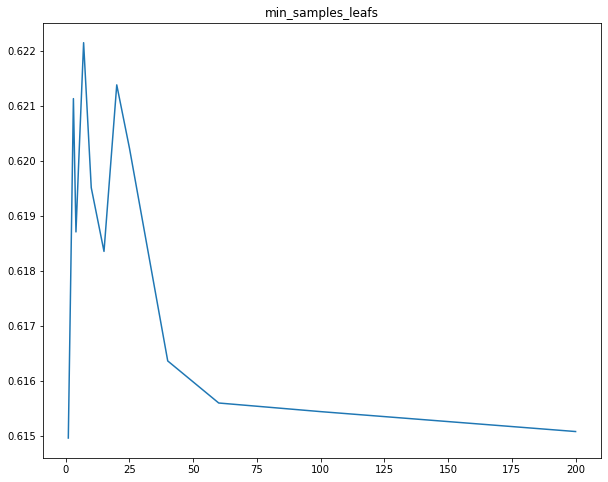

In [ ]:
min_samples_leafs = [1,3,4,5,7,10,15,20,25,40,60,100,200]
scores = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf,random_state=101)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    print(f"min_samples_leafs: {min_samples_leaf,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=min_samples_leafs,y=scores) 
plt.title('min_samples_leafs')
plt.show() 

In [ ]:
# min_samples_leaf = 20

In [ ]:
rf_1 = RandomForestClassifier(min_samples_leaf = 20,
                            min_samples_split = 110,
                            max_depth = 15,
                            max_features = 9,
                            n_estimators = 175,
                            bootstrap=False,
                            random_state=101)

In [ ]:
rf_1.fit(X_train,y_train)
y_pred_rf_1 = rf_1.predict(X_val)

f1_rf_1 = validation_score(y_val,y_pred_rf_1)



accuracy score:
 0.630625
f1 score :
 0.6222435282837967
Roc Auc score:
 0.6306158646902544
confusion metric:

 [[6267 3337]
 [3755 5841]]
classification report:

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      9604
           1       0.64      0.61      0.62      9596

    accuracy                           0.63     19200
   macro avg       0.63      0.63      0.63     19200
weighted avg       0.63      0.63      0.63     19200



In [ ]:
val_score.append(f1_rf_1)
models.append("RandomForestClassifier() tunning")

In [ ]:
y_test_rf_1 = rf_1.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_rf_1})

output.to_csv('Submission_rf_1_9apr.csv',index=False)

In [ ]:
## test score = 0.62837
test_score.append(0.62837)

In [ ]:
rf_rand = RandomForestClassifier(random_state=101)
param_rf = ({'n_estimators':[60,100,120,200],
             'max_features':[15,18,20,25],
             'min_samples_leaf':[1,5,10,15,20,25,60,200],
             'min_samples_split':[2,50,75,100,110,150],
             'max_depth':[1,7,10,15,19,23,27,50]
             })

In [ ]:
randomized_rf = RandomizedSearchCV(estimator=rf_rand,
                                   param_distributions=param_rf,
                                   n_iter=20,
                                   random_state=42)

In [ ]:
randomized_rf.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=101),
                   n_iter=20,
                   param_distributions={'max_depth': [1, 7, 10, 15, 19, 23, 27,
                                                      50],
                                        'max_features': [15, 18, 20, 25],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             25, 60, 200],
                                        'min_samples_split': [2, 50, 75, 100,
                                                              110, 150],
                                        'n_estimators': [60, 100, 120, 200]},
                   random_state=42)

In [ ]:
print(F"{print_bold('best_estimator_:')}{randomized_rf.best_estimator_}")


best_estimator_:
RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=15,
                       min_samples_split=150, n_estimators=60,
                       random_state=101)


In [ ]:
y_pred_rand_rf = randomized_rf.predict(X_val)
f1_rand_rf = validation_score(y_pred,y_pred_rand_rf)

accuracy score:
 0.961875
f1 score :
 0.9597581088510171
Roc Auc score:
 0.9616626553733659
confusion metric:

 [[9739  344]
 [ 388 8729]]
classification report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     10083
           1       0.96      0.96      0.96      9117

    accuracy                           0.96     19200
   macro avg       0.96      0.96      0.96     19200
weighted avg       0.96      0.96      0.96     19200



In [ ]:
val_score.append(f1_rand_rf)
models.append("RandomForestClassifier() RandomSearch")

In [ ]:
y_test_rand_rf = randomized_rf.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_rand_rf})

output.to_csv('Submission_rand_rf_9apr.csv',index=False)

In [ ]:
## test score = 0.63006
test_score.append(0.63006)

## Adaboost

In [ ]:
abc = AdaBoostClassifier(random_state=42)

abc.fit(X_train,y_train)

y_pred_abc = abc.predict(X_val)

f1_abc = validation_score(y_val,y_pred_abc)

accuracy score:
 0.62296875
f1 score :
 0.6123279601563755
Roc Auc score:
 0.6229574215203856
confusion metric:

 [[6244 3360]
 [3879 5717]]
classification report:

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      9604
           1       0.63      0.60      0.61      9596

    accuracy                           0.62     19200
   macro avg       0.62      0.62      0.62     19200
weighted avg       0.62      0.62      0.62     19200



In [ ]:
val_score.append(f1_abc)
models.append('AdaBoostClassifier()')

In [ ]:
y_test_abc = abc.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_abc})

output.to_csv('Submission_abc_9apr.csv',index=False)

In [ ]:
## test score = 0.61486
test_score.append(0.61486)

## hypertuning for Adaboost

In [ ]:
abc_1 = AdaBoostClassifier(random_state=42)
params_abc = {'n_estimators':[10,50,100,200],
             'learning_rate':[0.001,0.01,0.1,1.0,10]}

In [ ]:
grid_abc = GridSearchCV(abc_1,params_abc,cv=5,scoring='f1',verbose=1,n_jobs=-1)

In [ ]:
grid_abc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1', verbose=1)

In [ ]:
print(f"{print_bold('best_params_')}{grid_abc.best_params_}")

best_params_
{'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
y_pred_grid_abc = grid_abc.predict(X_val)
f1_grid_abc = validation_score(y_val,y_pred_grid_abc)


accuracy score:
 0.6228125
f1 score :
 0.6118555043413014
Roc Auc score:
 0.6228008459723691
confusion metric:

 [[6250 3354]
 [3888 5708]]
classification report:

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      9604
           1       0.63      0.59      0.61      9596

    accuracy                           0.62     19200
   macro avg       0.62      0.62      0.62     19200
weighted avg       0.62      0.62      0.62     19200



In [ ]:
val_score.append(f1_grid_abc)
models.append('AdaBoostClassifier() GridSearch')

In [ ]:
y_test_grid_abc = grid_abc.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_grid_abc})

output.to_csv('Submission_grid_abc_9apr.csv',index=False)

In [ ]:
## test score = 0.62331
test_score.append(0.62331)

## XGBoost

In [ ]:
xgb_1 = xgb.XGBClassifier()

In [ ]:
xgb_1.fit(X_train,y_train)
y_pred_xgb = xgb_1.predict(X_val)
f1_xgb = validation_score(y_val,y_pred_xgb)

accuracy score:
 0.6208333333333333
f1 score :
 0.6070387563424376
Roc Auc score:
 0.6208188143782664
confusion metric:

 [[6297 3307]
 [3973 5623]]
classification report:

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      9604
           1       0.63      0.59      0.61      9596

    accuracy                           0.62     19200
   macro avg       0.62      0.62      0.62     19200
weighted avg       0.62      0.62      0.62     19200



In [ ]:
val_score.append(f1_xgb)
models.append('XGBClassifier()')

In [ ]:
y_test_xgb = xgb_1.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_xgb})

output.to_csv('Submission_xgb_9apr.csv',index=False)

In [ ]:
## test score = 0.6334
test_score.append(0.6334)

## hypertuning for XGBoost

max_depth: (1, 0.6140530079028009)
max_depth: (2, 0.6152187971545592)
max_depth: (3, 0.6144038035550273)
max_depth: (4, 0.6129729729729729)
max_depth: (6, 0.6070387563424376)
max_depth: (5, 0.6066655757377407)
max_depth: (7, 0.604123933930692)
max_depth: (10, 0.5995698924731182)
max_depth: (20, 0.5962458594037542)


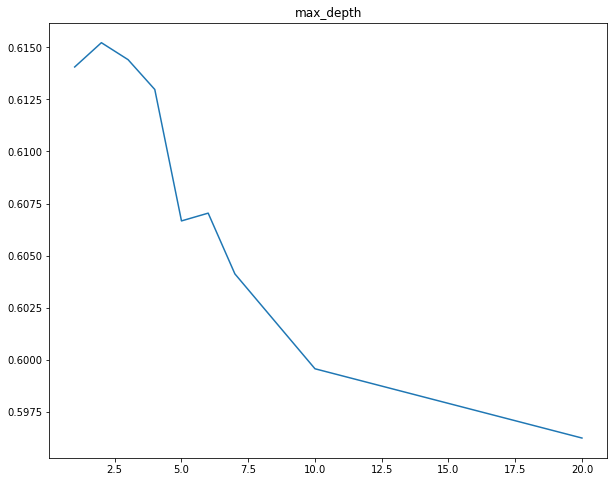

In [ ]:
max_depth = [1,2,3,4,6, 5, 7,10,20]
scores = []
for i in max_depth:
    xgb_3 = xgb.XGBClassifier(max_depth=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"max_depth: {i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=max_depth,y=scores) 
plt.title('max_depth')
plt.show()       

In [ ]:
# max_depth = 2

learning_rate:(10, 0.4642041638683681)
learning_rate:(0.1, 0.6137748772989591)
learning_rate:(0.01, 0.6096832038254633)
learning_rate:(0.001, 0.5946246112838738)


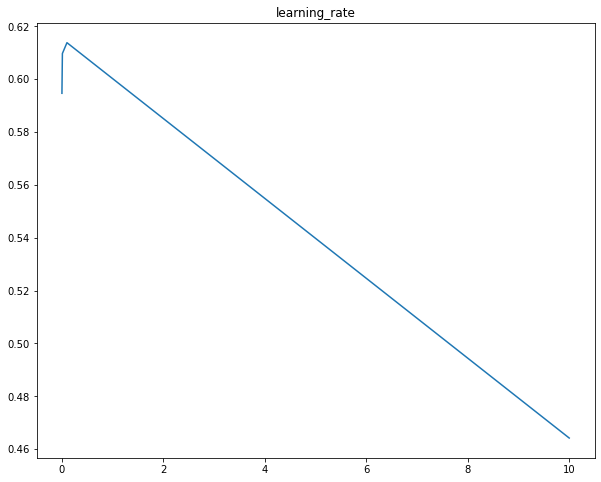

In [ ]:
learning_rate =  [10,0.1, 0.01, 0.001]
scores = []
for i in learning_rate:
    xgb_3 = xgb.XGBClassifier(learning_rate=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"learning_rate:{i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=learning_rate,y=scores) 
plt.title('learning_rate')
plt.show()

In [ ]:
# learning rate = 0.1

n_estimators: (1, 0.5900589721988205)
n_estimators: (50, 0.607625013500378)
n_estimators: (75, 0.6071640823383219)
n_estimators: (100, 0.6070387563424376)
n_estimators: (110, 0.605985440819628)
n_estimators: (130, 0.6028759865931451)
n_estimators: (150, 0.6025870000541214)
n_estimators: (200, 0.6016110720657404)
n_estimators: (500, 0.592784339103705)


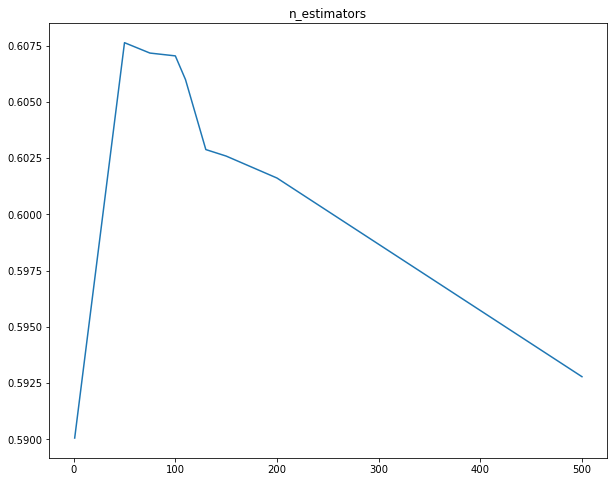

In [ ]:
n_estimators= [1,50,75,100,110,130,150,200, 500]
scores = []
for i in n_estimators:
    xgb_3 = xgb.XGBClassifier(n_estimators=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"n_estimators: {i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=n_estimators,y=scores) 
plt.title('n_estimators')
plt.show()

In [ ]:
# n_estimators = 50

gamma: (1, 0.6040173724212812)
gamma: (0, 0.6070387563424376)
gamma: (0.1, 0.6088175056591569)
gamma: (0.2, 0.6091545503500269)
gamma: (0.3, 0.6086768599059916)
gamma: (0.6, 0.6069802731411229)


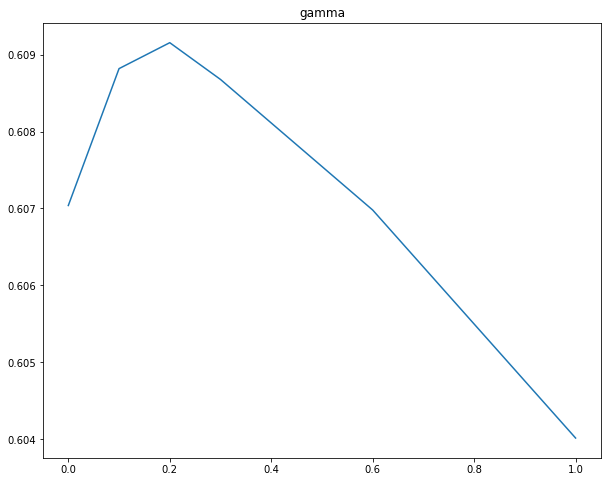

In [ ]:
gamma=[1,0, 0.1, 0.2,0.3,0.6]
scores = []
for i in gamma:
    xgb_3 = xgb.XGBClassifier(gamma=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"gamma: {i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=gamma,y=scores) 
plt.title('gamma')
plt.show()

In [ ]:
# gamma = 0.2

subsample: (0.1, 0.5680582735377256)
subsample: (0.3, 0.5869246236617576)
subsample: (0.5, 0.5975385944078592)
subsample: (0.6, 0.6003336382715385)
subsample: (0.7, 0.5962174172221318)
subsample: (0.9, 0.6046990038977912)


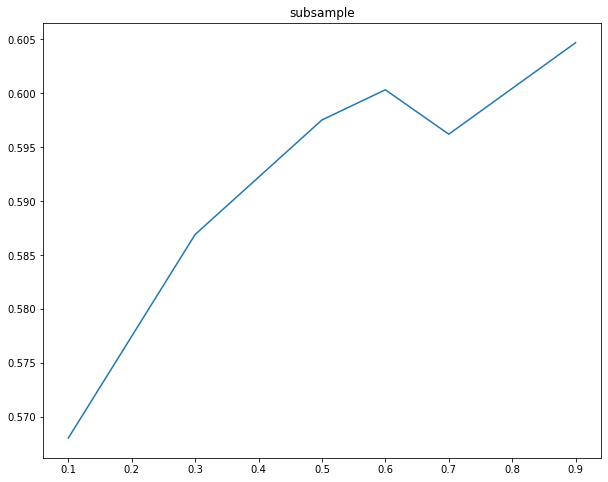

In [ ]:
subsample =[0.1,0.3,0.5,0.6, 0.7,0.9]
scores = []
for i in subsample:
    xgb_3 = xgb.XGBClassifier(subsample=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"subsample: {i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=subsample,y=scores) 
plt.title('subsample')
plt.show()

In [ ]:
# subsample = 0.9

colsample_bytree: (0.1, 0.6105071493600385)
colsample_bytree: (0.3, 0.6078558325240098)
colsample_bytree: (0.5, 0.6051387908088435)
colsample_bytree: (0.6, 0.6084135395263329)
colsample_bytree: (0.7, 0.6086156510444853)
colsample_bytree: (0.9, 0.6076772934287573)


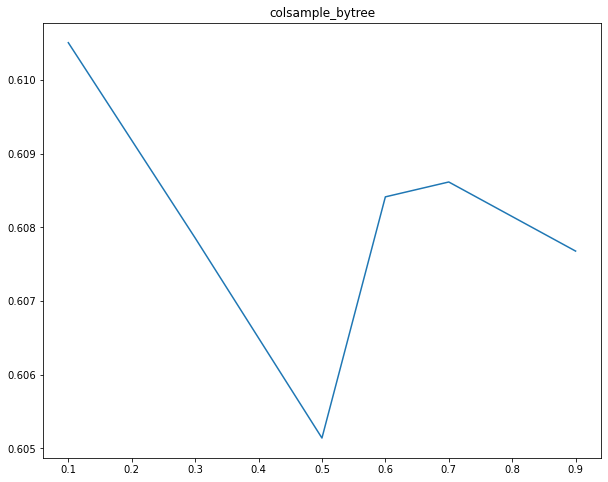

In [ ]:
colsample_bytree = [0.1,0.3,0.5,0.6, 0.7,0.9]
scores = []
for i in colsample_bytree:
    xgb_3 = xgb.XGBClassifier(colsample_bytree=i)
    xgb_3.fit(X_train,y_train)
    y_pred = xgb_3.predict(X_val)
    print(f"colsample_bytree: {i,f1_score(y_val,y_pred)}")
    scores.append(f1_score(y_val,y_pred))
plt.figure(figsize=(10,8))    
sns.lineplot(x=colsample_bytree,y=scores) 
plt.title('colsample_bytree')
plt.show()

In [ ]:
# colsample_bytree  = 0.7

In [ ]:
xgb_final = xgb.XGBClassifier(colsample_bytree=0.9,
                              subsample = 0.9,
                              gamma = 0.2,
                              n_estimators = 50,
                              learning_rate = 0.1,
                              max_depth=2
                             )

In [ ]:
xgb_final.fit(X_train,y_train)
y_pred_xgb = xgb_final.predict(X_val)
f1_xgb_final = validation_score(y_val,y_pred_xgb)

accuracy score:
 0.6236979166666666
f1 score :
 0.6157528054033932
Roc Auc score:
 0.6236894094946891
confusion metric:

 [[6186 3418]
 [3807 5789]]
classification report:

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      9604
           1       0.63      0.60      0.62      9596

    accuracy                           0.62     19200
   macro avg       0.62      0.62      0.62     19200
weighted avg       0.62      0.62      0.62     19200



In [ ]:
val_score.append(f1_xgb_final)
models.append("XGBClassifier() tunned")

In [ ]:
y_test_xgb_f = xgb_final.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_xgb_f})

output.to_csv('Submission_xgb_f_9apr.csv',index=False)

In [ ]:
# test score = 0.62837
test_score.append(0.62837)

In [ ]:
xgb_1 = xgb.XGBClassifier()
params_xgb = {'colsample_bytree':[0.3,0.6, 0.7,0.9],
              'subsample':[0.1,0.5,0.7,0.9],
              'gamma':[0.1, 0.2,0.6],
              'n_estimators':[1,50,75,100,150,200],
              'learning_rate':[0.1, 0.01, 0.001],
              'max_depth':[1,2,3, 5, 7,10]
              }

In [ ]:
randomized_xgb = RandomizedSearchCV(estimator=xgb_1,
                                   param_distributions=params_xgb,
                                   n_iter=30,
                                   random_state=42)

In [ ]:
randomized_xgb.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=30,
                   param_distributions={'colsample_bytree': [0.3, 0.6, 0.7,
                                                             0.9],
                                        'gamma': [0.1, 0.2, 0.6],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [1, 2, 3, 5, 7, 10],
                                        'n_estimators': [1, 50, 75, 100, 150,
                                                         200],
                                        'subsample': [0.1, 0.5, 0.7, 0.9]},
                   random_state=42)

In [ ]:
y_pred_rand_xgb = randomized_xgb.predict(X_val)
f1_rand_xgb = validation_score(y_val,y_pred_rand_xgb)

accuracy score:
 0.6258854166666666
f1 score :
 0.6126718792127258
Roc Auc score:
 0.6258713109151581
confusion metric:

 [[6336 3268]
 [3915 5681]]
classification report:

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      9604
           1       0.63      0.59      0.61      9596

    accuracy                           0.63     19200
   macro avg       0.63      0.63      0.63     19200
weighted avg       0.63      0.63      0.63     19200



In [ ]:
val_score.append(f1_rand_xgb)
models.append('XGBClassifier() RandomSearch')

In [ ]:
y_test_xgb_rand = xgb_final.predict(X_test)

output = pd.DataFrame({'Customer_id':test['Customer_id'],'Target':y_test_xgb_rand})

output.to_csv('Submission_xgb_rand_9apr.csv',index=False)

In [ ]:
## test score = 0.6452
test_score.append(0.6452)

## Final Result Analysis <a class='anchor' id='result'></a>

In [ ]:
val_final_scores = pd.DataFrame({"models":models,
                                 "score":val_score})

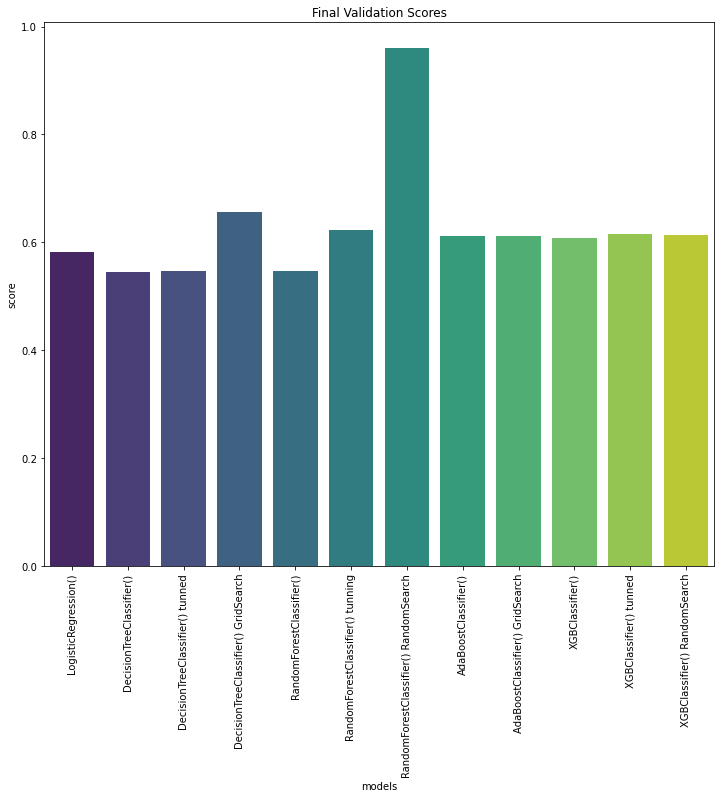

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='models', y='score', data=val_final_scores,palette='viridis')
plt.xticks(rotation=90)
plt.title('Final Validation Scores')
plt.show()


In [ ]:
test_final_scores = pd.DataFrame({"models":models,
                                 "score":test_score})

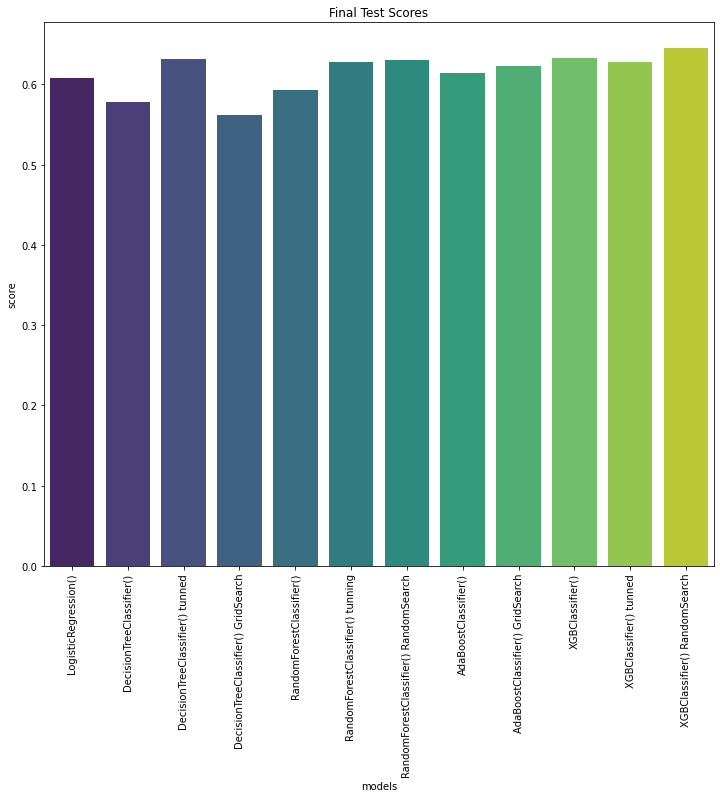

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='models', y='score', data=test_final_scores,palette='viridis')
plt.xticks(rotation=90)
plt.title("Final Test Scores")
plt.show()

### 11. ANN Implementation <a class="anchor" id="ANN"></a>

<div class="alert alert-block alert-info" >


An Artificial Neural Network (ANN) is a machine learning model inspired by the structure and function of the human brain. It consists of multiple layers of interconnected nodes (neurons) that perform mathematical operations on the input data to produce an output. The nodes in each layer learn to extract and represent different features of the input data. ANN can be used for a wide range of tasks, including classification, regression, and pattern recognition. ANN requires a large amount of labeled training data and may suffer from overfitting. We will be using FeedForward Neural network(FFNN) and Recurent Neural Network(RNN).

A Feedforward Neural Network (FFNN) is a type of Artificial Neural Network (ANN) in which the information flows in only one direction, from the input layer to the output layer. It is the simplest and most commonly used type of neural network. In an FFNN, each neuron in one layer is connected to every neuron in the next layer. The neurons in each layer process the inputs and pass on the outputs to the next layer, until the final output is produced. FFNNs can be used for classification and regression tasks and are trained using backpropagation algorithm. They are widely used in image recognition, natural language processing, and recommendation systems, among other applications.
    
Recurrent Neural Network (RNN) is a type of neural network that is designed to handle sequential data such as time series, speech, text, and video. It is different from other neural network architectures in that it allows for the network to have loops, which enables it to process input sequences of varying length and allows the network to retain memory of previous inputs.
In an RNN, each neuron receives input not only from the previous layer but also from the previous time step. The output of each neuron is fed back into the network and is used as input for the next time step. This feedback loop is what allows the network to maintain a memory of previous inputs.
</div>

In [ ]:

# Reshape the input data
#Reshaping is required to match the input shape of the LSTM layer, which requires a 3D input tensor of shape (batch_size, timesteps, input_dim).
#In this case, we are adding an additional dimension of size 1 to the input data.
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.20),
    LSTM(units=32, return_sequences=True),
    Dropout(0.20),
    LSTM(units=16, return_sequences=False),
    Dropout(0.20),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
ad = tf.keras.optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=ad, loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
score = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

y_pred = model.predict(X_val)

# Convert the predictions to binary output
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
acc_score = validation_score(y_val, y_pred_binary)



Epoch 1/10
1120/1120 [==============================] - 36s 28ms/step - loss: 0.6864 - accuracy: 0.5423 - val_loss: 0.6851 - val_accuracy: 0.5492
Epoch 2/10
1120/1120 [==============================] - 31s 27ms/step - loss: 0.6846 - accuracy: 0.5517 - val_loss: 0.6842 - val_accuracy: 0.5544
Epoch 3/10
1120/1120 [==============================] - 31s 27ms/step - loss: 0.6829 - accuracy: 0.5586 - val_loss: 0.6817 - val_accuracy: 0.5667
Epoch 4/10
1120/1120 [==============================] - 31s 27ms/step - loss: 0.6793 - accuracy: 0.5696 - val_loss: 0.6764 - val_accuracy: 0.5732
Epoch 5/10
1120/1120 [==============================] - 31s 28ms/step - loss: 0.6757 - accuracy: 0.5799 - val_loss: 0.6741 - val_accuracy: 0.5936
Epoch 6/10
1120/1120 [==============================] - 32s 28ms/step - loss: 0.6740 - accuracy: 0.5830 - val_loss: 0.6722 - val_accuracy: 0.5977
Epoch 7/10
1120/1120 [==============================] - 32s 28ms/step - loss: 0.6713 - accuracy: 0.5921 - val_loss: 0.6701 -

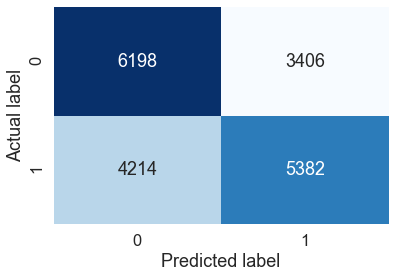

In [ ]:
cf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix using seaborn
sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

### FeedForward Neural Network

In [ ]:

# Define the model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.20),
    Dense(units=32, activation='relu'),
    Dropout(0.20),
    Dense(units=16, activation='relu'),
    Dropout(0.20),
    Dense(units=1, activation='sigmoid')
])

# Define the RMSprop optimizer
rm = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compile the model
model.compile(optimizer=rm, loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
score = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

y_pred = model.predict(X_val)

# Convert the predictions to binary output
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
score = validation_score(y_val, y_pred_binary)



Epoch 1/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6811 - accuracy: 0.5769 - val_loss: 0.6673 - val_accuracy: 0.6177
Epoch 2/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6661 - accuracy: 0.6096 - val_loss: 0.6621 - val_accuracy: 0.6196
Epoch 3/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6628 - accuracy: 0.6170 - val_loss: 0.6592 - val_accuracy: 0.6195
Epoch 4/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6603 - accuracy: 0.6189 - val_loss: 0.6588 - val_accuracy: 0.6205
Epoch 5/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6576 - accuracy: 0.6227 - val_loss: 0.6564 - val_accuracy: 0.6217
Epoch 6/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.6585 - accuracy: 0.6217 - val_loss: 0.6575 - val_accuracy: 0.6230
Epoch 7/10
1120/1120 [==============================] - 2s 1ms/step - loss: 0.6570 - accuracy: 0.6242 - val_loss: 0.6562 - val_accuracy:

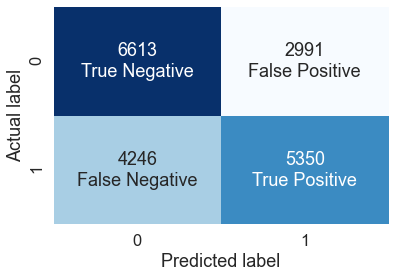

In [ ]:
# Compute confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred_binary)

# Define labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create annotation text
annotation = np.asarray([f"{v1}\n{v2}" for v1, v2 in zip(cf_matrix.flatten(), labels)]).reshape(2,2)

# Plot confusion matrix using seaborn
sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=annotation, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


## 12. Conclusion <a class="anchor" id="conclusion"></a>

If we see the accuracy scores of two models FeedForward neural network perfomed better compared to Recurrent neural network which is not suprising as FFNNs are generally better suited for simpler sequential tasks where long-term dependencies are not critical. RNNs, on the other hand, are better suited for tasks where long-term dependencies play a significant role in the sequence. In this case, the simpler architecture of the FFNN may have been sufficient to learn the patterns in the data, leading to a better accuracy score. However, it's important to note that this may not always be the case, and the choice of architecture should be based on the specific task and data at hand.

Randimforest Classifier performed better than these ANN models which suggests that for certain classification tasks simpler models such as RFclassifier may be more effective than complex neural network models